# Vivek Bavda:
## DSIR 7/12
### Project 2 August 9, 2021 
### Predicting Sales of Homes in Ames, Iowa

### Introduction:
*As you  are aware, you've asked me to predict*

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university. However, despite growth in locally determined outcomes, the SAT and ACT snapshots often are seen as the main evaluation point by your constituents. To the extent our students score well, it allows us greater political capital to institue educational reforms. It is imperative that we choose and mandate by state and local regulations which test demonstrates higher scores and bests represents our students' achievements.

This requires us to analyze the format and results of the SAT and ACT. The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections.)) The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). 
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

It is important to also keep in 

### Ames Houding datasets from 2006 - 2010 were used in this analysis.

* [AmesDatasetTrain']('./datasets/train.csv'):  What it is
   https://wwwgov/ds/sp/ai/

* ['AmesDatasetTest'](./datasets/test.csv'='./datasets/train.csv'(../data/sat_2019_ca.csv): 2019 SAT Scores in California by School, District and County. The data was collected from https://wwwgov/ds/sp/ai/
    The total number of testakers is listed. The dataset also breaks the scores down by grade level. Benchmarks are listed for the two measurement categories. First, the number of students who met or exceeded the benchmark for reading & writing is listed. Second, the number of students who met or exceeded the benchmark for math. There is also a category for meeting both benchmarks.
    
* ['AmesDatasetKagl']('./datasets/sample_sub_reg.csv'):
https://wwwgov/ds/sp/ai/

### Outside Research

Based on your problem statement and your chosen datasets, spend some time doing outside research on state policies or additional information that might be relevant. Summarize your findings below. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. **Make sure that you cite your sources.**

## Data cleaning:

In [28]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score, cross_validate, KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score
from sklearn import metrics
import statsmodels.api as sm
import patsy
#For EDA and Data cleaning
def datacleaningbox(feature):
    print(dftrain[feature].describe())
    print(dftrain[feature].isnull().sum())
    print(dftrain[feature].unique())
    print(dftrain[feature].value_counts())
    print(dftest[feature].describe())
    print(dftest[feature].isnull().sum())
    print(dftest[feature].unique())
    print(dftest[feature].value_counts())
    print(dftrain[feature].hist())
    sns.pairplot(dftrain, x_vars=[feature], y_vars=['SalePrice'])
    print(dftrain[[feature, 'SalePrice']].corr())
    sns.boxplot(x=dftrain['SalePrice'], y=dftrain[feature])
    return
def datacleaning(feature):
    print(dftrain[feature].describe())
    print(dftrain[feature].isnull().sum())
    print(dftrain[feature].unique())
    print(dftrain[feature].value_counts())
    print(dftest[feature].describe())
    print(dftest[feature].isnull().sum())
    print(dftest[feature].unique())
    print(dftest[feature].value_counts())
    print(dftrain[feature].hist())
    sns.pairplot(dftrain, x_vars=[feature], y_vars=['SalePrice'])
    print(dftrain[[feature, 'SalePrice']].corr())
    return

In [75]:
AmesDatasetTrain='./datasets/train.csv'

AmesDatasetTest='./datasets/test.csv'

AmesDatasetKagle='./datasets/sample_sub_reg.csv'

dftrain=pd.read_csv(AmesDatasetTrain)

dftest=pd.read_csv(AmesDatasetTest)

dfkagle=pd.read_csv(AmesDatasetKagle)

In [98]:
dftrain

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,square_feet
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,130500,1479
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,220000,2122
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2010,WD,109000,1057
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,174000,1444
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,138500,1445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2008,WD,298751,1728
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2009,WD,82500,861
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,NaN,NaN,NaN,0,3,2009,WD,177000,1913
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,11,2009,WD,144000,1200


In [7]:
dftrain.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [8]:
# Check for nulls
dftrain.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

In [14]:
#ccheck Data types
dftrain.dtypes.sort_values().head(60)

Id                   int64
2nd Flr SF           int64
Low Qual Fin SF      int64
Gr Liv Area          int64
Full Bath            int64
Half Bath            int64
Bedroom AbvGr        int64
Kitchen AbvGr        int64
TotRms AbvGrd        int64
1st Flr SF           int64
Fireplaces           int64
Open Porch SF        int64
Enclosed Porch       int64
3Ssn Porch           int64
Screen Porch         int64
Pool Area            int64
Misc Val             int64
Mo Sold              int64
Yr Sold              int64
Wood Deck SF         int64
SalePrice            int64
square_feet          int64
Lot Area             int64
Year Built           int64
Overall Qual         int64
Year Remod/Add       int64
Overall Cond         int64
MS SubClass          int64
PID                  int64
Mas Vnr Area       float64
Garage Cars        float64
Lot Frontage       float64
Bsmt Half Bath     float64
Bsmt Full Bath     float64
BsmtFin SF 1       float64
Garage Area        float64
BsmtFin SF 2       float64
B

In [ ]:
#81 total values--Exterior 1 is repeated because this was 22 and above is 60
dftrain.dtypes.sort_values().tail(22)

In [133]:
dftrain['square_feet']


0       1479
1       2122
2       1057
3       1444
4       1445
        ... 
2046    1728
2047     861
2048    1913
2049    1200
2050    1804
Name: square_feet, Length: 2051, dtype: int64

In [48]:
datacleaning('SalePrice')

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64
0
[130500 220000 109000 174000 138500 190000 140000 142000 112500 135000
  85400 183600 131000 200000 193000 173500  98000 139000 143500 215200
 129000 278000 344133 185000 145000 187500 198000 119600 122900 230000
 270000 125000 297000 113500 127000 175500 146000 147500 465000 165500
 131500 129500 257076 117000 149000 128000 155000 166000 250000  76000
 158000 149500 121000 136000 173000 290000 303477 122250 153000 147000
 148500 130000 372000 213490 308030 300000 159500 137500 232000  93850
 105000  68500 154300 129850 114000 501837 153900 160500 310090 184900
 132000 163000 183000 211000 184000 118858 180500 148000 124000 277500
 350000 387000  86000  44000 215000 146500 165000 252000 150000 139900
 162900 160000  63900 149900 231500 108000 120000 128500 115000 110000
 

KeyError: 'SalePrice'

In [53]:
dftest

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,square_feet
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,1928
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,8,2006,WD,1967
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,New,1496
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,7,2007,WD,968
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,185,0,NaN,NaN,NaN,0,7,2009,WD,1394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,527377110,60,RL,80.0,8000,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2007,WD,1877
874,1234,535126140,60,RL,90.0,14670,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,NaN,0,8,2008,WD,1988
875,1373,904100040,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,8,2008,WD,1211
876,1672,527425140,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,...,0,0,NaN,GdWo,NaN,0,5,2007,WD,864


count    2051.000000
mean     1474.033642
std       843.980841
min         1.000000
25%       753.500000
50%      1486.000000
75%      2198.000000
max      2930.000000
Name: Id, dtype: float64
0
[109 544 153 ... 916 639  10]
2049    1
749     1
2556    1
507     1
505     1
       ..
1068    1
1066    1
1062    1
1060    1
2047    1
Name: Id, Length: 2051, dtype: int64
count     878.000000
mean     1444.749431
std       850.838263
min         2.000000
25%       692.250000
50%      1433.000000
75%      2197.500000
max      2928.000000
Name: Id, dtype: float64
0
[2658 2718 2414 1989  625  333 1327  858   95 1568 2482 1364 2584  818
 2673 2089 1297  790 2616  720  222  557 1148 2766  534 1452  630 2648
  125 1904 1670  756  717 1032  852 1731 2639 2071 1267 1851  567 2439
 1898  647 2256  979 1444 2485  157   88 2003  186 1425 2695  738  395
 1353 1878  390 1456 1103 1387 2070 1199 2479  501 2362 1718 2188 1483
 2557  437 2224 1628  397  587  971 2611 1887 2399 2148  304 1997 2817
 1431  

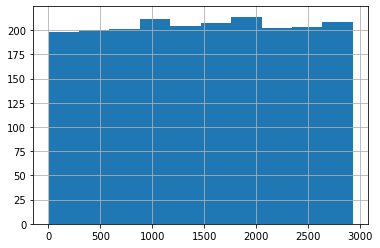

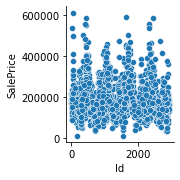

In [105]:
#Going through each numeric variable
#Id is unclear-I don't see it labeled as such in the data dictionary possibly pID for people to take look at. No relevance to this project
datacleaning('Id')             


count    2051.000000
mean      329.329108
std       425.671046
min         0.000000
25%         0.000000
50%         0.000000
75%       692.500000
max      1862.000000
Name: 2nd Flr SF, dtype: float64
0
[ 754 1209    0  700  614 1040  504  728  645  720  783 1044  673  957
  252  725  550  745  890  620  651  862  756  653 1392  546  689  600
 1106 1426  780  531  732  739 1169  665  616  540  786 1368 1157  709
  690  445  836  564 1345  707  650  712  676  601  240 1862  881  408
 1427  857 1074  876 1045  813  927  576  539  586  624 1182  702 1093
  884  743  941 1312 1384 1296  492  462  981 1277 1254  272  750  608
  656 1370  595  797  960  549  703 1250  453  561  685  636  872  886
  840  829  670  795  505  698  537  864  804  704  412  924  896  376
  438 1371 1089  755  589 1158  980 1038  517  925  602  887  741  348
  390 1036  672  475  464 1194  530  701  929  584  465  319  563  695
  668  582  545 1005  757  585  684  787  888  336  551  903 1198  524
  482  869  738 

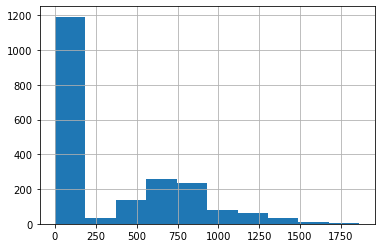

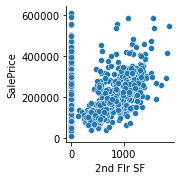

In [106]:
#no nulls--there are 0s-probably ranches. This was combined with 1st floor sq feet /
#for 'square_feet'
datacleaning('2nd Flr SF')

count    2051.000000
mean     1164.488055
std       396.446923
min       334.000000
25%       879.500000
50%      1093.000000
75%      1405.000000
max      5095.000000
Name: 1st Flr SF, dtype: float64
0
[ 725  913 1057  744  831 1888 1072 1188  924 1040  483 1208 1288  962
 1361 1430  624 1121 1285  764  894 1659 1209 1187 1056 1453 1265 1034
  672 2524  792 1494  948 1718 1142  925 1844 1242  990 1256 2076 1110
 1050  983  984  851 1063  768 1328 1392  546 1575  663  600  936  916
 1164 1184 1483  960 1382 1120  567  976 1802 1506 1508 2032 1194  970
 1616  872  520 1105  616 2234  876  864 1189 1666 1200  928 1336 1427
 1212  754 1535 1152 1151 1138 1074 1561 1358 1884  605 1671  797  804
 1193  673 1664 1390  868 1422 1128 1116  660 1707 1466 1638 1721  996
 1202  988 1028  720 1599  707  959  813 1092 1055  676  855 1719  780
 1554 1528 1008 1172 1418  495  985  888 1992 1478  950  912 1326 1204
  798 1236 1416  946 1088  816  536  572 1126  992  752 1218 1601 1313
  807 1325  733 

            1st Flr SF  SalePrice
1st Flr SF    1.000000   0.618486
SalePrice     0.618486   1.000000


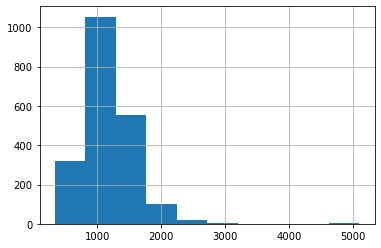

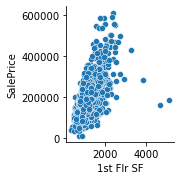

In [107]:
# no null no  absurdities no 0's. It makes sense to combine square feet  with 2nd flooor
datacleaning('1st Flr SF')

count    2051.000000
mean     1493.817162
std       497.618666
min       334.000000
25%      1124.500000
50%      1440.000000
75%      1728.000000
max      5642.000000
Name: square_feet, dtype: float64
0
[1479 2122 1057 ... 2668 1913 1804]
864     25
1040    20
1092    19
1456    15
1200    14
        ..
1892     1
2057     1
1898     1
1908     1
2037     1
Name: square_feet, Length: 1051, dtype: int64
count     878.000000
mean     1494.185649
std       505.042804
min       407.000000
25%      1108.250000
50%      1436.000000
75%      1776.000000
max      4476.000000
Name: square_feet, dtype: float64
0
[1928 1967 1496  968 1394 1092 1093 1268 1680 1279 1217 1040 1375 2787
 1827 1340 1436 1073 1773 1742 1060  864 1617  988 1218 1738 1750 1054
  670  858  848 2640 1178 1492 1458 1657  998  910 1358 1224 1886 1327
 1363 1501 1344 1786  965  936 1248 2268 1615 1360 1142 1026 1820 1193
 1865 2006 1140 1176 1670 1603 2063 1302  774  747 2520 1560 1472 1050
 1724 1771 1207  882 1780 1459 110

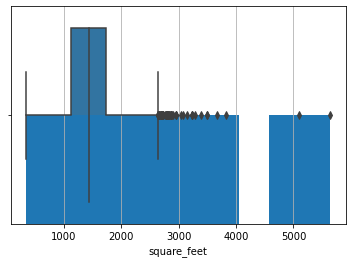

In [11]:
dftrain['square_feet'] = dftrain['1st Flr SF'] + dftrain['2nd Flr SF']
dftest['square_feet']=dftest['1st Flr SF'] + dftest['2nd Flr SF']
datacleaning('square_feet')

count    2051.000000
mean        5.512921
std        51.068870
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1064.000000
Name: Low Qual Fin SF, dtype: float64
0
[   0  205   80  528  513  371  473  108 1064  515  120  312  572  234
  390  697  114  512  144  514  397  140  479  259  436  156  384  360
   53  362  450]
0       2018
80         3
205        2
512        1
515        1
513        1
479        1
473        1
397        1
371        1
259        1
53         1
1064       1
572        1
528        1
514        1
450        1
436        1
390        1
384        1
362        1
360        1
312        1
234        1
156        1
144        1
140        1
120        1
114        1
108        1
697        1
Name: Low Qual Fin SF, dtype: int64
count    878.000000
mean       2.728929
std       32.572548
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      481.000000
Name: Low Qual Fin SF, dtype: floa

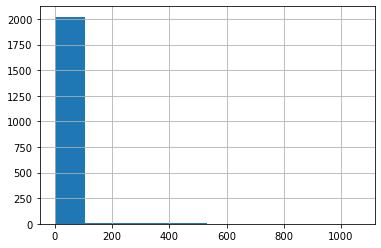

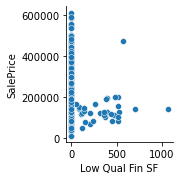

In [109]:
datacleaning('Low Qual Fin SF')  #Useless variable-not enough data points to be useful-
#Can drop id, 1stflsq, 2ndflsq and low qual.

count    2051.000000
mean     1499.330083
std       500.447829
min       334.000000
25%      1129.000000
50%      1444.000000
75%      1728.500000
max      5642.000000
Name: Gr Liv Area, dtype: float64
0
[1479 2122 1057 ... 2668 1913 1804]
864     25
1040    20
1092    19
1200    16
1456    15
        ..
1894     1
1898     1
2057     1
1908     1
2037     1
Name: Gr Liv Area, Length: 1053, dtype: int64
count     878.000000
mean     1496.914579
std       506.468967
min       407.000000
25%      1114.000000
50%      1436.000000
75%      1779.000000
max      4476.000000
Name: Gr Liv Area, dtype: float64
0
[1928 1967 1496  968 1394 1092 1093 1268 1680 1279 1217 1040 1375 2787
 1827 1340 1436 1073 1773 1742 1060  864 1617  988 1218 1738 1750 1054
  670  858 1208 2640 1178 1492 1458 1657  998  910 1358 1224 1886 1327
 1363 1501 1344 1786  965  936 1248 2268 1615 1360 1142 1026 1820 1193
 1865 2006 1140 1176 1670 1603 2063 1302  774  848  747 2520 1560 1472
 1050 1724 1771 1207  882 1780 145

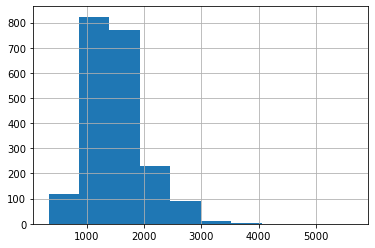

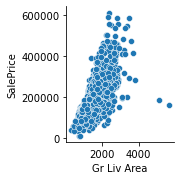

In [110]:
datacleaning('Gr Liv Area')  #Looks no different than square feet-dropping this as dup-
#Sq feet's correlation is higher than this one by a small margin
#Can drop id, 1stflsq, 2ndflsq, gr liv area and low qual.

count    2051.000000
mean        1.577279
std         0.549279
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: Full Bath, dtype: float64
0
[2 1 3 0 4]
2    1096
1     900
3      45
0       8
4       2
Name: Full Bath, dtype: int64
count    878.000000
mean       1.539863
std        0.559060
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: Full Bath, dtype: float64
0
[2 1 4 3 0]
2    436
1    418
3     18
0      4
4      2
Name: Full Bath, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           Full Bath  SalePrice
Full Bath   1.000000   0.537969
SalePrice   0.537969   1.000000


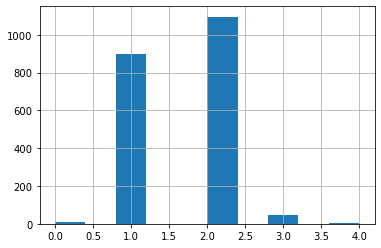

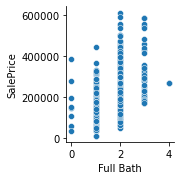

In [111]:
datacleaning('Full Bath')# May need to do an interaction with square feet and bedrooms\
# may need to make a dummy with 0< 1 bath or greater than 1 bath
#--Can drop id, 1stflsq, 2ndflsq, gr liv area and low qual.

count    2051.000000
mean        0.371039
std         0.501043
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Half Bath, dtype: float64
0
[1 0 2]
0    1308
1     725
2      18
Name: Half Bath, dtype: int64
count    878.000000
mean       0.398633
std        0.505927
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: Half Bath, dtype: float64
0
[0 1 2]
0    535
1    336
2      7
Name: Half Bath, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           Half Bath  SalePrice
Half Bath   1.000000   0.283001
SalePrice   0.283001   1.000000


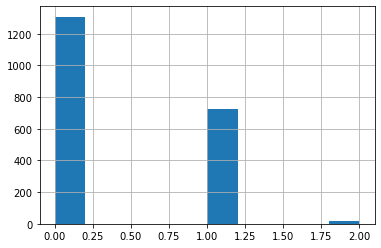

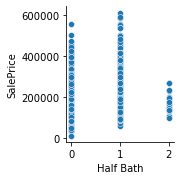

In [112]:
datacleaning('Half Bath')  #May have to add the baths or use interaction

count    2051.000000
mean        2.843491
std         0.826618
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: Bedroom AbvGr, dtype: float64
0
[3 4 2 5 1 0 6 8]
3    1108
2     544
4     265
1      75
5      41
6      12
0       5
8       1
Name: Bedroom AbvGr, dtype: int64
count    878.000000
mean       2.879271
std        0.830712
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        6.000000
Name: Bedroom AbvGr, dtype: float64
0
[4 6 3 2 1 5 0]
3    488
2    199
4    135
1     37
6      9
5      7
0      3
Name: Bedroom AbvGr, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
               Bedroom AbvGr  SalePrice
Bedroom AbvGr       1.000000   0.137067
SalePrice           0.137067   1.000000


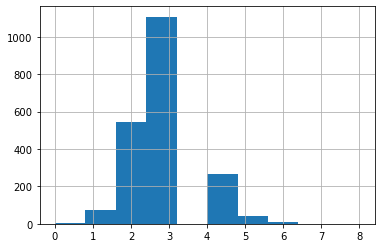

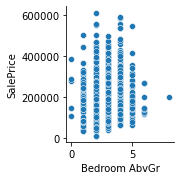

In [113]:
datacleaning('Bedroom AbvGr')   #correlation is surprisingly low-probably wouldn't include
#--Can drop id, 1stflsq, 2ndflsq, gr liv area, bedroom abvgr, half bathand low qual.
#include sq feet and Full Bath

count    2051.000000
mean        1.042906
std         0.209790
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Kitchen AbvGr, dtype: float64
0
[1 2 0 3]
1    1960
2      88
0       2
3       1
Name: Kitchen AbvGr, dtype: int64
count    878.000000
mean       1.047836
std        0.223966
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: Kitchen AbvGr, dtype: float64
0
[2 1 0 3]
1    835
2     41
0      1
3      1
Name: Kitchen AbvGr, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
               Kitchen AbvGr  SalePrice
Kitchen AbvGr       1.000000  -0.125444
SalePrice          -0.125444   1.000000


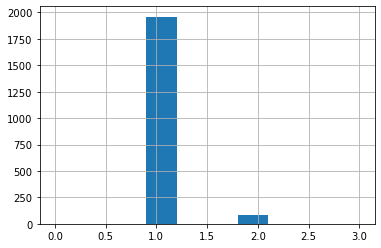

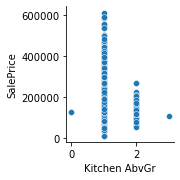

In [114]:
datacleaning('Kitchen AbvGr')# based on low correlation and scatterplot-leave out variable-drop
#--Can drop id, 1stflsq, 2ndflsq, gr liv area, bedroom abvgr, kitchen abv gr,and low qual.
#include sq feet and Full Bath Half bath

count    2051.000000
mean        6.435885
std         1.560225
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        15.000000
Name: TotRms AbvGrd, dtype: float64
0
[ 6  8  5  7  9  4 12 11 10  3 14  2 13 15]
6     597
7     475
5     407
8     228
4     146
9      98
10     49
11     22
12     13
3      12
2       1
14      1
13      1
15      1
Name: TotRms AbvGrd, dtype: int64
count    878.000000
mean       6.454442
std        1.596632
min        3.000000
25%        5.000000
50%        6.000000
75%        7.000000
max       12.000000
Name: TotRms AbvGrd, dtype: float64
0
[ 9 10  7  5  6  3  8  4 11 12]
6     247
5     179
7     174
8     119
4      57
9      45
10     31
3      14
11      9
12      3
Name: TotRms AbvGrd, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
               TotRms AbvGrd  SalePrice
TotRms AbvGrd       1.000000   0.504014
SalePrice           0.504014   1.000000


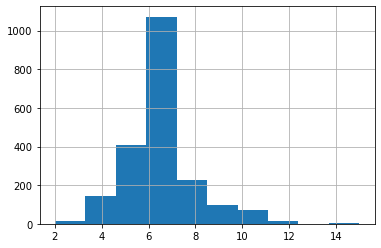

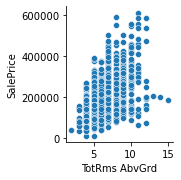

In [115]:
datacleaning('TotRms AbvGrd')

#Can drop id, 1stflsq, 2ndflsq, gr liv area, bedroom abvgr, kitchen abv gr,half bath,and low qual.
#include sq feet and Full Bath Half bath, TotrmsAbvGrd
#maybe include--sq feet should cover this

count    2051.000000
mean        0.590931
std         0.638516
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: Fireplaces, dtype: float64
0
[0 1 2 4 3]
0    1000
1     898
2     146
3       6
4       1
Name: Fireplaces, dtype: int64
count    878.000000
mean       0.618451
std        0.669571
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: Fireplaces, dtype: float64
0
[0 1 2 3]
0    422
1    375
2     75
3      6
Name: Fireplaces, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
            Fireplaces  SalePrice
Fireplaces    1.000000   0.471093
SalePrice     0.471093   1.000000


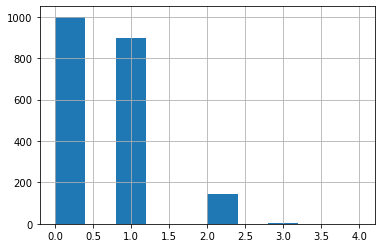

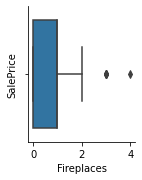

In [10]:
datacleaning('Fireplaces') ##Can drop id, 1stflsq, 2ndflsq, gr liv area, bedroom abvgr, kitchen abv gr,half bath,and low qual.
#include sq feet and Full Bath,half bath, totrms abv gr, fireplace
#maybe include tot rms abv gra and fireplace due to correl--sq feet should cover this

count    2051.000000
mean       47.556802
std        66.747241
min         0.000000
25%         0.000000
50%        27.000000
75%        70.000000
max       547.000000
Name: Open Porch SF, dtype: float64
0
[ 44  74  52   0  59 324  58  50  80  45 142  21  49 144  40 120  30  48
  28  26 122  68 229  27  32 112  36 172  84  57 364 105  20  46  60  75
  41  11  72  47 169  76  90 192 153  15 189 140  99  35  70 180  38  73
  34 104  96 162 108 170 285  23 128 288  56  54 136 299 154  64 158  88
  63  33 160  66 100  37  93  24  97  39 121 319  12  42 304 110 168  87
  43 235 166  25  77 101  98  82 126 211 205 200 127  85 208  55  69 228
 198 131  95 133 130 341 124 152  22 175  78 291  29 173  65 274 111  62
 114 118  18 129 365 125 116  16  92 234 141 444 372 102  51 155 119  91
   8 251 258 226  81 182 103 146 113 238 213  94 150 184  53 207 174 117
 187 240  61 123 278 191 106 292 547 243 214  67 215 225 199 138 312 260
 137 204 134 148 502 418 252 165 176 151 236 265 224 107 183 210

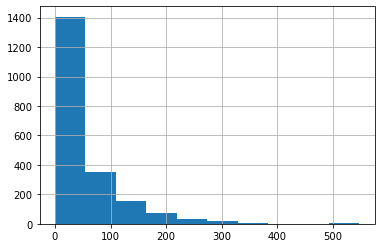

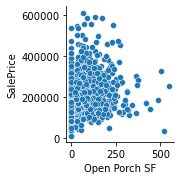

In [15]:
datacleaning('Open Porch SF')##Can drop open porcy sf due to many missing values no linear relationship, id, 1stflsq, 2ndflsq, gr liv area, bedroom abvgr, kitchen abv gr,half bath,and low qual.
#include sq feet and Full Bath,half bath, totrms abv gr, fireplace, 
#maybe include tot rms abv gra and fireplace due to correl--sq feet should cove

count    2051.000000
mean       22.571916
std        59.845110
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       432.000000
Name: Enclosed Porch, dtype: float64
0
[  0  96 133  64 207 112 164 160 236 192  84 116  87 143 194 156 168 144
  94  36 100 120 130  16 128 176 177 364  56 216 158 208  32  70 272 324
 190  48  52  81  24 259 291 268 228  40 137 252 205 240 123 246  30 180
 114  45 172 115 265 264 211  90 280 150 134  77 368  60 213 167 102  18
  80 222 234 105 101 135  34 104 148 239 109  26  50 145 140 219 189 183
 175  66  75  72 198 122 432 330  44 162 296 200 244 214 204  20 169  43
 260 121  78 184 117  54  25 318 210 212 186 129 185  37 203 126  39  35
 174 202 224 275 196 161  92 138  55 218 225  88 165 170 294 249 154  42
 288 226 136 231 113  68 301  57 256  19  99 230  23  98  67]
0      1724
112      13
96       10
144       6
84        6
       ... 
268       1
260       1
256       1
72        1
301       1
Name: Enclosed 

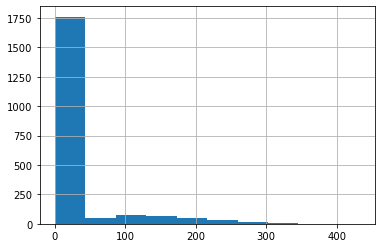

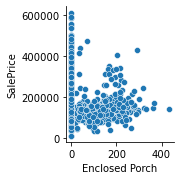

In [16]:
datacleaning('Enclosed Porch')##Can drop enclosed porch(low correlation and missing values,open porcy sf due to many missing values, id, 1stflsq, 2ndflsq, gr liv area, bedroom abvgr, kitchen abv gr,half bath,and low qual.
#include sq feet, Full Bath,half bath, totrms abv gr, fireplace, 
#maybe include tot rms abv gra and fireplace due to correl--sq feet should cove

count    2051.000000
mean        2.591419
std        25.229615
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3Ssn Porch, dtype: float64
0
[  0 176 224 162 168 120 407 144 150 255 508 180 140  96 323 153  86 216
 245 182 290 304]
0      2025
153       3
168       3
144       2
216       1
323       1
255       1
245       1
508       1
304       1
290       1
224       1
182       1
86        1
180       1
176       1
162       1
150       1
140       1
120       1
96        1
407       1
Name: 3Ssn Porch, dtype: int64
count    878.000000
mean       2.597950
std       24.962482
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      360.000000
Name: 3Ssn Porch, dtype: float64
0
[  0 180 130 225 219 360 238  23 174 196 216 320]
0      867
23       1
130      1
174      1
180      1
196      1
216      1
219      1
225      1
238      1
320      1
360      1
Name: 3Ssn Porch, dtype: int64
Axe

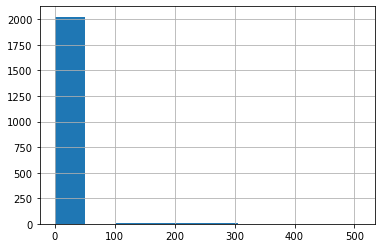

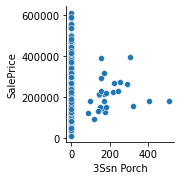

In [17]:
datacleaning('3Ssn Porch')##Can drop 3SSn, low corr, enclosed porch(low correlation and missing values,open porcy sf due to many missing values, id, 1stflsq, 2ndflsq, gr liv area, bedroom abvgr, kitchen abv gr,half bath,and low qual.
#include sq feet and Full Bath
#maybe include tot rms abv gra and fireplace due to correl--sq feet should cove

count    2051.000000
mean        2.397855
std        37.782570
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       800.000000
Name: Pool Area, dtype: float64
0
[  0 519 576 800 228 480 648 738 368 561]
0      2042
228       1
368       1
480       1
576       1
648       1
738       1
800       1
519       1
561       1
Name: Pool Area, dtype: int64
count    878.000000
mean       1.884966
std       29.916672
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      555.000000
Name: Pool Area, dtype: float64
0
[  0 144 555 512 444]
0      874
144      1
444      1
512      1
555      1
Name: Pool Area, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           Pool Area  SalePrice
Pool Area   1.000000   0.023106
SalePrice   0.023106   1.000000


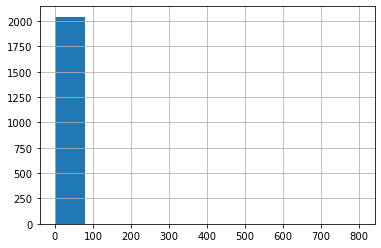

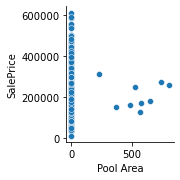

In [18]:
datacleaning('Pool Area')##Can drop Pool area sq ft, too few and low cor3SSn, low corr, enclosed porch(low correlation and missing values,open porcy sf due to many missing values, id, 1stflsq, 2ndflsq, gr liv area, bedroom abvgr, kitchen abv gr,half bath,and low qual.
#include sq feet, Full Bath,half bath, totrms abv gr, fireplace,

count     2051.000000
mean        51.574354
std        573.393985
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      17000.000000
Name: Misc Val, dtype: float64
0
[    0   400   500  2000   650   600  1200   480   700   450  3000 12500
  4500   460  3500  8300   455   300  1150   900    54  6500   800  1500
  2500  1300 17000    80]
0        1986
400        12
500         8
600         6
2000        5
450         5
700         4
4500        2
2500        2
3000        2
1200        2
6500        1
900         1
1500        1
455         1
1300        1
1150        1
650         1
800         1
54          1
17000       1
480         1
460         1
300         1
12500       1
8300        1
80          1
3500        1
Name: Misc Val, dtype: int64
count      878.000000
mean        48.498861
std        550.169317
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: Misc Val, dtype:

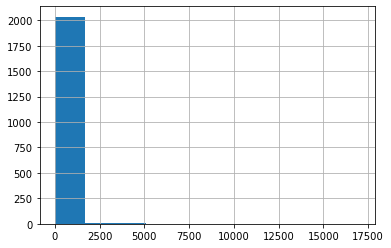

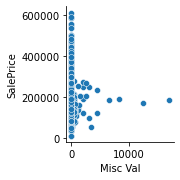

In [19]:
datacleaning('Misc Val') #drop misc val-too few instances, low corr-distribution off##Can drop 3SSn, low corr, enclosed porch(low correlation and missing values,open porcy sf due to many missing values, id, 1stflsq, 2ndflsq, gr liv area, bedroom abvgr, kitchen abv gr,half bath,and low qual.
#include sq feet, Full Bath,half bath, totrms abv gr, fireplace,

count    2051.000000
mean        6.219893
std         2.744736
min         1.000000
25%         4.000000
50%         6.000000
75%         8.000000
max        12.000000
Name: Mo Sold, dtype: float64
0
[ 3  4  1  6  5  9  7  2 12 10 11  8]
6     352
7     303
5     257
4     208
3     168
8     167
10    123
9     109
2     104
11    103
1      79
12     78
Name: Mo Sold, dtype: int64
count    878.000000
mean       6.202733
std        2.642498
min        1.000000
25%        5.000000
50%        6.000000
75%        8.000000
max       12.000000
Name: Mo Sold, dtype: float64
0
[ 4  8  9  7  6  5 10  1  2 11 12  3]
6     153
7     146
5     138
4      71
8      66
3      64
9      52
10     49
1      44
11     40
2      29
12     26
Name: Mo Sold, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
            Mo Sold  SalePrice
Mo Sold    1.000000   0.032735
SalePrice  0.032735   1.000000


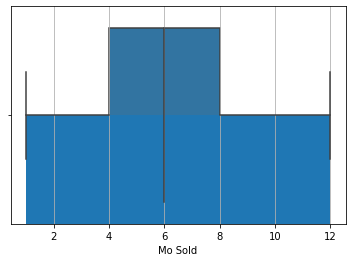

In [12]:
datacleaning('Mo Sold')# this should have an effect- maybe change to dummyvariable#drop misc val-too few instances, low corr-distribution off##Can drop 3SSn, low corr, enclosed porch(low correlation and missing values,open porcy sf due to many missing values, id, 1stflsq, 2ndflsq, gr liv area, bedroom abvgr, kitchen abv gr,half bath,and low qual.
##maybe include mo oldtot rms abv gra and fireplace due to correl, variabl--sq feet should cove
#include sq feet, Full Bath,half bath, totrms abv gr, fireplace, mo sold, yr sold
dftrain=pd.get_dummies(dftrain, prefix='Month' columns=['Mo Sold'], drop_first=True)
dftest=pd.get_dummies(dftest, prefix='Month' columns=['Mo Sold'], drop_first=True)

count    2051.000000
mean     2007.775719
std         1.312014
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: Yr Sold, dtype: float64
0
[2010 2009 2006 2007 2008]
2007    498
2009    446
2006    438
2008    435
2010    234
Name: Yr Sold, dtype: int64
count     878.000000
mean     2007.825740
std         1.327861
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: Yr Sold, dtype: float64
0
[2006 2007 2009 2010 2008]
2009    202
2007    195
2006    187
2008    187
2010    107
Name: Yr Sold, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
            Yr Sold  SalePrice
Yr Sold    1.000000  -0.015203
SalePrice -0.015203   1.000000


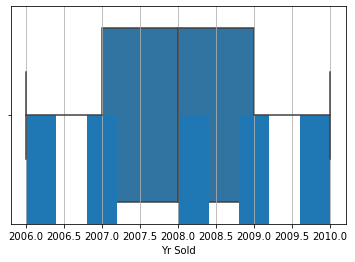

In [13]:
datacleaning('Yr Sold')# this should have an effect- maybe change to dummyvariable to2006-10 and after#drop misc val-too few instances, low corr-distribution off##Can drop 3SSn, low corr, enclosed porch(low correlation and missing values,open porcy sf due to many missing values, id, 1stflsq, 2ndflsq, gr liv area, bedroom abvgr, kitchen abv gr,half bath,and low qual.
##maybe include yo sold(up to 2009, and after) andmo sold as dummytot rms abv gra and fireplace due to correl, variabl--sq feet should cove
##include sq feet, Full Bath,half bath, totrms abv gr, fireplace, mo sold, yr sold
dftrain=pd.get_dummies(dftrain, prefix='Year', columns=['Yr Sold'], drop_first=True)
dftest=pd.get_dummies(dftest, prefix='Year',columns=['Yr Sold'], drop_first=True)


count    2051.000000
mean       93.833740
std       128.549416
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max      1424.000000
Name: Wood Deck SF, dtype: float64
0
[   0  100  335  105  169  138  212  243  483  264  416  474  208  104
  256  736  216  303  431  200  379  168  132  496  280  158  142   49
  418  228  261  312  225  140  227  203  307  214  125  153   88  230
   50  276  144  421  187  122   52  156  204  344  240  160  193  114
  275   12  120  328  108  182   28  178   60  250   38  324  646  176
  248  112  306  143  302  257  146  409  224  232  192  136  441   48
  180  221  263   81  134  164  268  194  191   32  161   96  210  173
   90  106  172  393   63  196  246  288  385  237  205  188  242   30
   54  439  209   22  236  282   24   86  300  384  148  147  365  238
  201  370  327  521  184  298  315  371  128  211  218  270  390  133
  135  206  342  262  329   94  319  126  530  190   45   66  354  289
  382   84  19

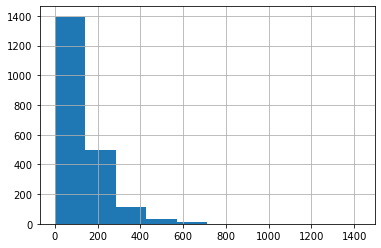

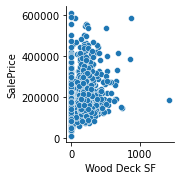

In [23]:
datacleaning('Wood Deck SF')# .3 is worth letting ridge and lasso lookt-this should have an effect- maybe change to dummyvariable to2006-09 and after#drop misc val-too few instances, low corr-distribution off##Can drop 3SSn, low corr, enclosed porch(low correlation and missing values,open porcy sf due to many missing values, id, 1stflsq, 2ndflsq, gr liv area, bedroom abvgr, kitchen abv gr,half bath,and low qual.
##maybe include yo sold(up to 2009, and after) andmo sold as dummytot rms abv gra and fireplace due to correl, variabl--sq feet should cove
##include sq feet, Full Bath,half bath, totrms abv gr, fireplace, mo sold, yr sold, Wood Deck SF

count    2051.000000
mean     1984.190151
std        21.036250
min      1950.000000
25%      1964.500000
50%      1993.000000
75%      2004.000000
max      2010.000000
Name: Year Remod/Add, dtype: float64
0
[2005 1997 2007 1993 2002 2006 1959 1952 1969 1971 2000 1950 1963 1977
 2009 1968 1955 1961 1995 1981 1996 2008 1958 1973 1994 1965 1978 1954
 1960 2004 1970 1951 1975 1953 2001 2010 2003 1979 1964 1956 1972 1957
 1992 1962 1998 1990 1967 1985 1987 1988 1976 1984 1999 1966 1980 1989
 1991 1986 1982 1983 1974]
1950    262
2006    139
2007    123
2005    100
2004     83
       ... 
1952      9
2010      8
1983      7
1981      6
1982      3
Name: Year Remod/Add, Length: 61, dtype: int64
count     878.000000
mean     1984.417995
std        20.450725
min      1950.000000
25%      1967.000000
50%      1992.000000
75%      2003.000000
max      2010.000000
Name: Year Remod/Add, dtype: float64
0
[1950 1977 2006 1963 1972 1989 2004 1991 1992 1954 2000 1996 1956 1986
 2001 1961 1994 1969 2007

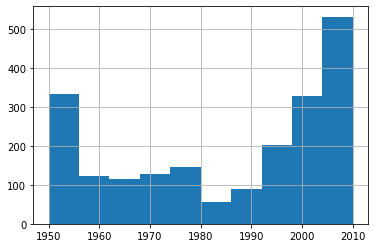

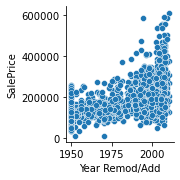

In [25]:
datacleaning('Year Remod/Add')# unclear--doesn't appear to hhave an effect-this should have an effect- maybe change to dummyvariable to2006-09 and after#drop misc val-too few instances, low corr-distribution off##Can drop 3SSn, low corr, enclosed porch(low correlation and missing values,open porcy sf due to many missing values, id, 1stflsq, 2ndflsq, gr liv area, bedroom abvgr, kitchen abv gr,half bath,and low qual.
##maybe include year remod as prior oto 2000 and afteryo sold(up to 2009, and after) andmo sold as dummytot rms abv gra and fireplace due to correl, variabl--sq feet should cove
##include sq feet, Full Bath,half bath, totrms abv gr, fireplace, mo sold, yr sold, Wood Deck SF

count      2051.000000
mean      10065.208191
std        6742.488909
min        1300.000000
25%        7500.000000
50%        9430.000000
75%       11513.500000
max      159000.000000
Name: Lot Area, dtype: float64
0
[13517 11492  7922 ... 12444 11449  7558]
9600     34
7200     27
6000     26
10800    19
9000     18
         ..
7711      1
7697      1
9742      1
9738      1
8190      1
Name: Lot Area, Length: 1476, dtype: int64
count       878.000000
mean      10307.033030
std       10002.674602
min        1477.000000
25%        7297.250000
50%        9446.000000
75%       11589.000000
max      215245.000000
Name: Lot Area, dtype: float64
0
[  9142   9662  17104   8520   9500   1890   8516   9286   3515  10125
   7175   7200  11310   7976  11737   9060  10800   9571  17671   8246
   8499   8012  21453   9605   7180  12513   9000   8800   3500   7340
   6240  11700  10000  11166  13204   5520   8892   7321   3951  11214
   7388  14559   4054   1533  11250   7800   5868   7500   9439  

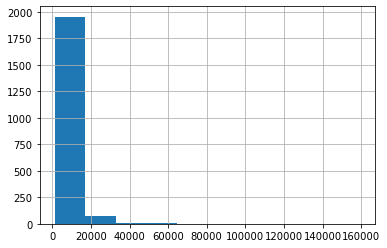

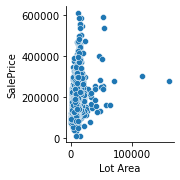

In [26]:
datacleaning('Lot Area')# Lot area should have an effect but is .29# year remodunclear--doesn't appear to hhave an effect-this should have an effect- maybe change to dummyvariable to2006-09 and after#drop misc val-too few instances, low corr-distribution off##Can drop 3SSn, low corr, enclosed porch(low correlation and missing values,open porcy sf due to many missing values, id, 1stflsq, 2ndflsq, gr liv area, bedroom abvgr, kitchen abv gr,half bath,and low qual.
##maybe include year remod as prior oto 2000 and afteryo sold(up to 2009, and after) andmo sold as dummytot rms abv gra and fireplace due to correl, variabl--sq feet should cove
#include sq feet, Full Bath,half bath, totrms abv gr, fireplace, mo sold, yr sold, Wood Deck SF\
#Lot Area also in

count    2.051000e+03
mean     7.135900e+08
std      1.886918e+08
min      5.263011e+08
25%      5.284581e+08
50%      5.354532e+08
75%      9.071801e+08
max      9.241520e+08
Name: PID, dtype: float64
0
[533352170 531379050 535304180 ... 909253010 535179160 527162130]
533250050    1
907410100    1
531385020    1
532376250    1
528235190    1
            ..
531451150    1
905201030    1
923252100    1
903456130    1
527450110    1
Name: PID, Length: 2051, dtype: int64
count    8.780000e+02
mean     7.162867e+08
std      1.889103e+08
min      5.263021e+08
25%      5.284841e+08
50%      5.354542e+08
75%      9.071904e+08
max      1.007100e+09
Name: PID, dtype: float64
0
[ 902301120  905108090  528218130  902207150  535105100  923228370
  902427150  907202130  533208090  914476010  531452100  903455140
  535303050  906230030  903206160  905480180  902128150  905451300
  535425040  902330040  905105070  532354160  531451020  906475050
  531363010  907227050  535150070  902125020  534425310

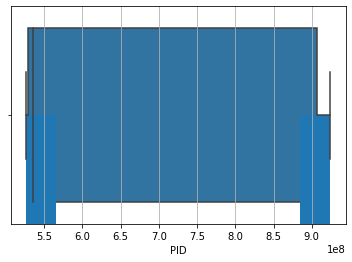

In [16]:
datacleaning('PID')#shouldn't have an effect# Lot area should have an effect but is .29# year remodunclear--doesn't appear to hhave an effect-this should have an effect- maybe change to dummyvariable to2006-09 and after#drop misc val-too few instances, low corr-distribution off##Can drop 3SSn, low corr, enclosed porch(low correlation and missing values,open porcy sf due to many missing values, id, 1stflsq, 2ndflsq, gr liv area, bedroom abvgr, kitchen abv gr,half bath,and low qual.
##maybe include year remod as prior oto 2000 and afteryo sold(up to 2009, and after) andmo sold as dummytot rms abv gra and fireplace due to correl, variabl--sq feet should cove
#include sq feet and Full Bath

In [15]:
datacleaning('MS SubClass')# MS SubclassCategory variable-needs to be transformed into dummy variables, maybe interaction#PID shouldn't have an effect# Lot area should have an effect but is .29# year remodunclear--doesn't appear to hhave an effect-this should have an effect- maybe change to dummyvariable to2006-09 and after#drop misc val-too few instances, low corr-distribution off##Can drop 3SSn, low corr, enclosed porch(low correlation and missing values,open porcy sf due to many missing values, id, 1stflsq, 2ndflsq, gr liv area, bedroom abvgr, kitchen abv gr,half bath,and low qual.
##maybe include MS SubClass, year remod as prior oto 2000 and afteryo sold(up to 2009, and after) andmo sold as dummytot rms abv gra and fireplace due to correl, variabl--sq feet should cove
#include sq feet, Full Bath,half bath, totrms abv gr, fireplace, mo sold, yr sold, Wood Deck SF\
#Lot Area also in, Add MS Subclass as a dummy
dftrain=pd.get_dummies(dftrain, prefix='MS SubClass', columns=['MS SubClass'], drop_first=True)
dftest=pd.get_dummies(dftest, prefix='MS SubClass', columns=['MS SubClass'], drop_first=True)

count    2051.000000
mean        6.112140
std         1.426271
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: Overall Qual, dtype: float64
0
[ 6  7  5  8 10  4  9  3  2  1]
5     563
6     506
7     431
8     250
4     159
9      77
3      29
10     23
2       9
1       4
Name: Overall Qual, dtype: int64
count    878.000000
mean       6.050114
std        1.369065
min        2.000000
25%        5.000000
50%        6.000000
75%        7.000000
max       10.000000
Name: Overall Qual, dtype: float64
0
[ 6  5  7  4  8  3  9 10  2]
5     262
6     226
7     171
8     100
4      67
9      30
3      11
10      7
2       4
Name: Overall Qual, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
              Overall Qual  SalePrice
Overall Qual      1.000000   0.800207
SalePrice         0.800207   1.000000


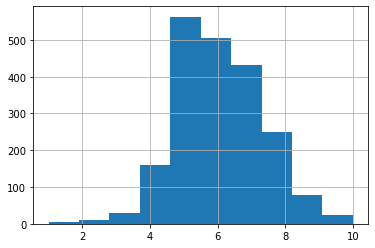

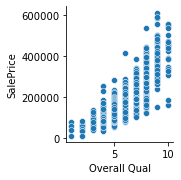

In [30]:
datacleaning('Overall Qual')#Overall Qual should be included graphs and corr high# MS SubclassCategory variable-needs to be transformed into dummy variables, maybe interaction#PID shouldn't have an effect# Lot area should have an effect but is .29# year remodunclear--doesn't appear to hhave an effect-this should have an effect- maybe change to dummyvariable to2006-09 and after#drop misc val-too few instances, low corr-distribution off##Can drop 3SSn, low corr, enclosed porch(low correlation and missing values,open porcy sf due to many missing values, id, 1stflsq, 2ndflsq, gr liv area, bedroom abvgr, kitchen abv gr,half bath,and low qual.
##maybe include MS SubClass, year remod as prior oto 2000 and afteryo sold(up to 2009, and after) andmo sold as dummytot rms abv gra and fireplace due to correl, variabl--sq feet should cove
#include Overall Qual,include sq feet, Full Bath,half bath, totrms abv gr, fireplace, mo sold, yr sold, Wood Deck SF\
#Lot Area also in, Add MS Subclass

count    2051.000000
mean     1971.708922
std        30.177889
min      1872.000000
25%      1953.500000
50%      1974.000000
75%      2001.000000
max      2010.000000
Name: Year Built, dtype: float64
0
[1976 1996 1953 2006 1900 1966 2005 1959 1952 1969 1971 1880 1999 2007
 2004 1916 1963 1977 2009 1968 2000 1992 1955 1961 1965 1937 1895 1949
 1981 1929 1995 1958 1973 1994 1978 1954 1935 1941 1931 2003 1928 1970
 1951 1920 1930 1924 1927 1960 1925 1910 2008 1915 1997 1956 1979 1964
 2001 1972 1957 1939 1962 1947 1940 1932 1967 1993 1875 1912 2010 1987
 1918 1988 1922 1926 1984 1942 1890 2002 1975 1998 1936 1938 1985 1923
 1948 1950 1980 1991 1917 1986 1946 1885 1914 1896 1983 1921 1945 1901
 1990 1974 1913 1905 1982 1919 1872 1892 1934 1879 1893 1898 1911 1908
 1989]
2005    102
2006     99
2007     78
2004     72
2003     64
       ... 
1898      1
1896      1
1892      1
1875      1
1872      1
Name: Year Built, Length: 113, dtype: int64
count     878.000000
mean     1970.492027
std 

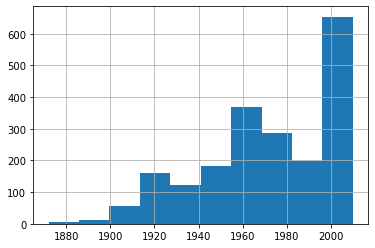

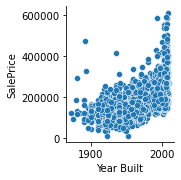

In [31]:
datacleaning('Year Built')#Year Built appears to have an effect-corr at.57#Overall Qual should be included graphs and corr high# MS SubclassCategory variable-needs to be transformed into dummy variables, maybe interaction#PID shouldn't have an effect# Lot area should have an effect but is .29# year remodunclear--doesn't appear to hhave an effect-this should have an effect- maybe change to dummyvariable to2006-09 and after#drop misc val-too few instances, low corr-distribution off##Can drop 3SSn, low corr, enclosed porch(low correlation and missing values,open porcy sf due to many missing values, id, 1stflsq, 2ndflsq, gr liv area, bedroom abvgr, kitchen abv gr,half bath,and low qual.
##maybe include Year BuiltMS SubClass, year remod as prior oto 2000 and afteryo sold(up to 2009, and after) andmo sold as dummytot rms abv gra and fireplace due to correl, variabl--sq feet should cove
##include Year Built, Overall Qual,include sq feet, Full Bath,half bath, totrms abv gr, fireplace, mo sold, yr sold, Wood Deck SF\
#Lot Area also in, Add MS Subclass

count    2051.000000
mean        5.562165
std         1.104497
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: Overall Cond, dtype: float64
0
[8 5 7 6 3 9 2 4 1]
5    1168
6     368
7     270
8     101
4      70
3      35
9      29
2       6
1       4
Name: Overall Cond, dtype: int64
count    878.000000
mean       5.566059
std        1.128903
min        1.000000
25%        5.000000
50%        5.000000
75%        6.000000
max        9.000000
Name: Overall Cond, dtype: float64
0
[8 4 5 6 7 9 3 2 1]
5    485
6    165
7    120
8     43
4     31
3     15
9     12
2      4
1      3
Name: Overall Cond, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
              Overall Cond  SalePrice
Overall Cond      1.000000  -0.097019
SalePrice        -0.097019   1.000000


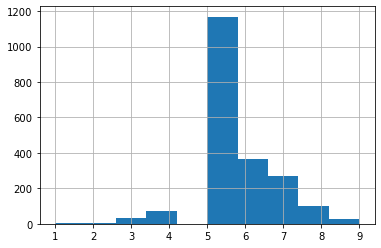

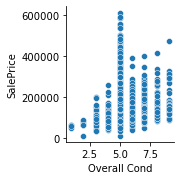

In [32]:
datacleaning('Overall Cond')#Overall Cond should have an effect but corr is low.-not include#Year Built appears to have an effect-corr at.57#Overall Qual should be included graphs and corr high# MS SubclassCategory variable-needs to be transformed into dummy variables, maybe interaction#PID shouldn't have an effect# Lot area should have an effect but is .29# year remodunclear--doesn't appear to hhave an effect-this should have an effect- maybe change to dummyvariable to2006-09 and after#drop misc val-too few instances, low corr-distribution off##Can drop 3SSn, low corr, enclosed porch(low correlation and missing values,open porcy sf due to many missing values, id, 1stflsq, 2ndflsq, gr liv area, bedroom abvgr, kitchen abv gr,half bath,and low qual.
##mue 
##include Year Built, Overall Qual,include sq feet, Full Bath,half bath, totrms abv gr, fireplace, mo sold, yr sold, Wood Deck SF\
#Lot Area also in, Add MS Subclass

count    2050.000000
mean     1057.987805
std       449.410704
min         0.000000
25%       793.000000
50%       994.500000
75%      1318.750000
max      6110.000000
Name: Total Bsmt SF, dtype: float64
0
[ 725.  913. 1057.  384.  676. 1517.  547. 1188.  924. 1040.  483. 1208.
    0.  960. 1351. 1430.  624. 1121.  660.  756.  894. 1501. 1209. 1168.
 1056. 1453.  942.  957.  672. 2524.  792. 1494.  948. 1705.  160.  757.
 1844. 1242.  990. 1256. 2076. 1097. 1050.  608.  984.  776.  764. 1122.
 1392.  546.  216.  663.  600.  936.  916. 1152. 1184. 1420. 1382. 1120.
  531.  976. 1802. 1362. 1508. 1840.  655.  970. 1616.  768.  872.  520.
 1105.  616. 2216.  876.  864. 1189. 1666. 1176.  928. 1288. 1427.  860.
  754. 1141. 1138. 1561. 1342. 1884.  528. 1426.  245.  804. 1153.  673.
  714.  690.  978. 1078. 1116. 1140. 1466. 1614.  988.  996. 1202. 1008.
  720.  994.  707.  637.  813. 1055.  855. 1719.  780. 1554. 1528.  982.
 1172. 1642.  884. 1422.  985.  888. 1992. 1478.  930.  912. 132

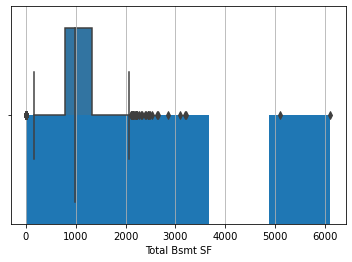

In [17]:
dftrain.dropna(subset=['Total Bsmt SF'], inplace=True)
datacleaning('Total Bsmt SF')# Total Bsmt SF shows a strong corr on graph and otherwise One Nan#Overall Cond should have an effect but corr is low.-not include#Year Built appears to have an effect-corr at.57#Overall Qual should be included graphs and corr high# MS SubclassCategory variable-needs to be transformed into dummy variables, maybe interaction#PID shouldn't have an effect# Lot area should have an effect but is .29# year remodunclear--doesn't appear to hhave an effect-this should have an effect- maybe change to dummyvariable to2006-09 and after#drop misc val-too few instances, low corr-distribution off##Can drop 3SSn, low corr, enclosed porch(low correlation and missing values,open porcy sf due to many missing values, id, 1stflsq, 2ndflsq, gr liv area, bedroom abvgr, kitchen abv gr,half bath,and low qual.
#
#include Total Bsmt SF, include Year Built, Overall Qual,include sq feet, Full Bath,half bath, totrms abv gr, fireplace, mo sold, yr sold, Wood Deck SF\
#Lot Area also in, Add MS Subclass

count    2049.000000
mean       47.982430
std       165.037776
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFin SF 2, dtype: float64
1
[   0.  713.  117. 1057.  173.  290.  420.  469.   42.  955.  483.  147.
  596.  206.  382.  546.  202.  228.  661.  279.  106.  321.  232.  956.
  670.  915.  116. 1080.   80.  215.  144.  590.  149.  281.  297.  612.
  468.  891.  622.  507.  432.  852.  108.  128.  294. 1061.  127.  712.
  125.  324.  252.  247.   72.  150.  906.  555.   38.  180.   64.  288.
  311.  227.  842.  620.  181.  162.  354.  539.  551.  110.  219.  547.
  186.  774.  123.  613.  167.  230.  495.  208.  308.  604.  154.  334.
  417.  624.  442.  497.  211. 1474.  532.  132.  829. 1127.  435.  174.
  105.  375.  608. 1039. 1063.  264.  270.  259.  531.  488.  500.   41.
  177.  169.  344.  869.  182.  768.  119.  619.  345.  645.  278.  113.
  466.  522.    6.  377.   92.  859.  479.  239. 1083. 1085.  441

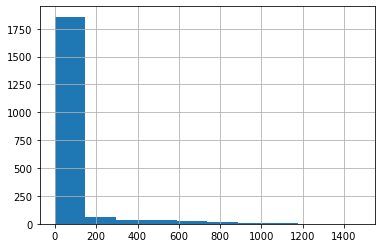

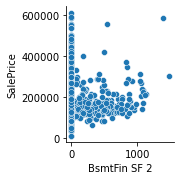

In [179]:
datacleaning('BsmtFin SF 2')  ##Contains one Nan that could be dropped if necessary. \
#However, correlation is low, and the graph does not show a relationship


count    2049.000000
mean        1.776964
std         0.764531
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: Garage Cars, dtype: float64
1
[ 2.  1.  3.  0.  4.  5. nan]
2.0    1136
1.0     523
3.0     263
0.0     113
4.0      13
5.0       1
Name: Garage Cars, dtype: int64
count    878.000000
mean       1.742597
std        0.750391
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: Garage Cars, dtype: float64
0
[1 2 4 0 3]
2    467
1    254
3    110
0     44
4      3
Name: Garage Cars, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
             Garage Cars  SalePrice
Garage Cars     1.000000   0.648007
SalePrice       0.648007   1.000000


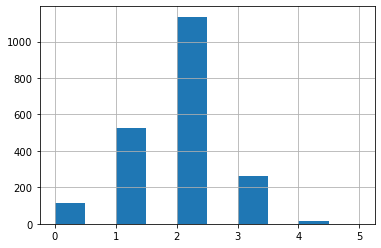

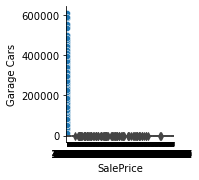

In [26]:
#dftrain.dropna(subset=['Garage Cars'], inplace=True)
datacleaning('Garage Cars') ###Contains one Nan that will be dropped. \
#Correlation is high, and the graph does not show a linear relationship
##include Total Bsmt SF, include Year Built, Overall Qual,include sq feet, Full Bath,half bath, totrms abv gr, fireplace, mo sold, yr sold, Wood Deck SF\
#Lot Area also in, Add MS Subclass--this would be added but there is better Garage variable below

In [183]:
#datacleaning('BsmtFin SF 1')# Total Bsmt SF probably covers the relationship rather than finished square feet of either type
print(dftrain[['BsmtFin SF 1', 'Total Bsmt SF', 'SalePrice']].corr())
#Overall Cond should have an effect but corr is low.-not include#Year Built appears to have an effect-corr at.57#Overall Qual should be included graphs and corr high# MS SubclassCategory variable-needs to be transformed into dummy variables, maybe interaction#PID shouldn't have an effect# Lot area should have an effect but is .29# year remodunclear--doesn't appear to hhave an effect-this should have an effect- maybe change to dummyvariable to2006-09 and after#drop misc val-too few instances, low corr-distribution off##Can drop 3SSn, low corr, enclosed porch(low correlation and missing values,open porcy sf due to many missing values, id, 1stflsq, 2ndflsq, gr liv area, bedroom abvgr, kitchen abv gr,half bath,and low qual.
##maybe include Year BuiltMS SubClass, year remod as prior oto 2000 and afteryo sold(up to 2009, and after) andmo sold as dummytot rms abv gra and fireplace due to correl, variabl--sq feet should cove
#include G Total Bsmt SF, Overall Qual, sq feet and Full Bath

               BsmtFin SF 1  Total Bsmt SF  SalePrice
BsmtFin SF 1       1.000000       0.539081   0.423583
Total Bsmt SF      0.539081       1.000000   0.628894
SalePrice          0.423583       0.628894   1.000000


                Bsmt Full Bath  Total Bsmt SF  SalePrice
Bsmt Full Bath        1.000000       0.321263   0.283564
Total Bsmt SF         0.321263       1.000000   0.628894
SalePrice             0.283564       0.628894   1.000000
count    2048.000000
mean        0.427734
std         0.522715
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: Bsmt Full Bath, dtype: float64
2
[ 0.  1.  2. nan  3.]
0.0    1199
1.0     824
2.0      23
3.0       2
Name: Bsmt Full Bath, dtype: int64
count    878.000000
mean       0.439636
std        0.529948
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: Bsmt Full Bath, dtype: float64
0
[0 1 2]
0    507
1    356
2     15
Name: Bsmt Full Bath, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
                Bsmt Full Bath  SalePrice
Bsmt Full Bath        1.000000   0.283564
SalePrice             0.283564   1.000000


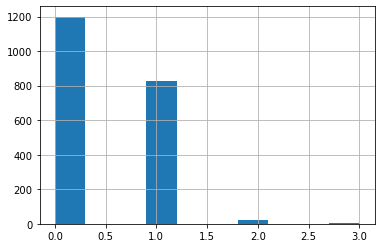

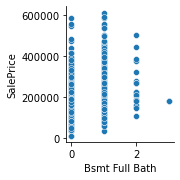

In [184]:
print(dftrain[['Bsmt Full Bath', 'Total Bsmt SF', 'SalePrice']].corr())

datacleaning('Bsmt Full Bath')  # Low overall correlation probably picked up by Total Bsmt Sf

               Bsmt Unf SF  Total Bsmt SF  SalePrice
Bsmt Unf SF       1.000000       0.419168   0.190123
Total Bsmt SF     0.419168       1.000000   0.628894
SalePrice         0.190123       0.628894   1.000000
count    2049.000000
mean      567.853587
std       445.027230
min         0.000000
25%       220.000000
50%       475.000000
75%       811.000000
max      2336.000000
Name: Bsmt Unf SF, dtype: float64
1
[ 192.  276.  326.  384.  676.  557.    0.  188.  632.  390.   96.  815.
  147. 1327. 1430.  624.  470.  660.  732.  402.  343. 1209.  233.  141.
  224.  336.  957.  672. 1420.  792.  507.  417.  160.   36. 1139.  570.
  136.  690. 1050.  134.  398.  156.  776.  412.  764.  403.  500.  133.
  370.  216.  292.  190.  450.  778.  628. 1120.  328.  576.  727.  914.
  285.  976. 1802. 1346.  162. 1140.  970. 1616.  768.  872.  520.  662.
  936.  448.  312.  876.  325. 1251.  551.  588.  320.  599.   98.  122.
  138. 1081.  550.  250.  408.  547.  180.  245.  114.  191.   32.  595.


             Bsmt Unf SF  SalePrice
Bsmt Unf SF     1.000000   0.190123
SalePrice       0.190123   1.000000


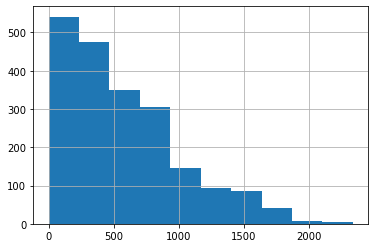

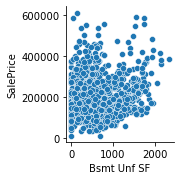

In [185]:
print(dftrain[['Bsmt Unf SF', 'Total Bsmt SF', 'SalePrice']].corr())  #low correlation-not put in
datacleaning('Bsmt Unf SF')

count    1719.000000
mean       69.048866
std        23.258429
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64
330
[ nan  43.  68.  73.  82. 137.  35.  70.  21.  64. 120.  24.  74.  93.
  34.  80.  71.  72. 109.  40. 103. 100.  92.  65.  75.  60.  30.  79.
  41. 105. 107.  81.  36.  63.  32.  94.  44.  50.  48.  67.  88.  83.
  53.  58.  57.  52.  87. 134.  56.  54. 140.  78.  85.  90.  96.  62.
  49.  59. 155.  91.  61.  86. 128.  77.  42.  89.  51.  69.  55. 112.
  76. 125.  98. 113. 102.  22. 122.  84. 119. 118.  66.  95. 108. 195.
 106.  39. 110. 130.  97.  45.  37. 123.  38. 129. 115.  47. 114. 104.
  46. 121. 124. 313. 141. 101.  99. 160. 174.  26. 144. 138. 111.  25.
  33. 200. 150. 117. 153. 116. 135.]
60.0     179
70.0      96
80.0      94
50.0      89
65.0      71
        ... 
119.0      1
117.0      1
137.0      1
22.0       1
195.0      1
Name: Lot Frontage, Length: 118, dtype: int64

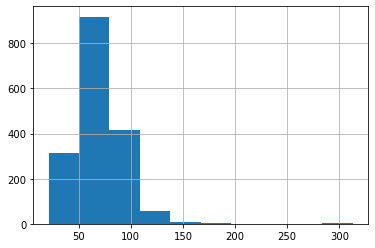

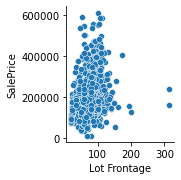

In [6]:
datacleaning('Lot Frontage')#the graph makes it look like a blob. Even with a .34 corr, not using

count    1936.000000
mean     1978.724690
std        25.436797
min      1895.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2207.000000
Name: Garage Yr Blt, dtype: float64
113
[1976. 1997. 1953. 2007. 1957. 1966. 2005. 1959. 1952. 1969. 1971. 1900.
 2000. 2004. 1916. 1963. 1977. 2009. 1968. 1992. 1955. 1961. 1973. 1937.
   nan 2003. 1981. 1931. 1995. 1958. 1965. 2006. 1978. 1954. 1935. 1951.
 1996. 1999. 1920. 1930. 1924. 1960. 1949. 1986. 1956. 1994. 1979. 1964.
 2001. 1972. 1939. 1962. 1927. 1948. 1967. 1993. 2010. 1915. 1987. 1970.
 1988. 1982. 1941. 1984. 1942. 1950. 2002. 1975. 2008. 1974. 1998. 1918.
 1938. 1985. 1923. 1980. 1991. 1946. 1940. 1990. 1896. 1983. 1914. 1945.
 1921. 1925. 1926. 1936. 1932. 1947. 1929. 1910. 1917. 1922. 1934. 1989.
 1928. 2207. 1933. 1895. 1919.]
2005.0    105
2007.0     84
2006.0     80
2004.0     72
2003.0     66
         ... 
1919.0      1
1896.0      1
1895.0      1
1917.0      1
1933.0      1
Name: Garage Yr Blt, L

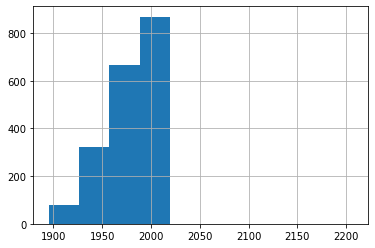

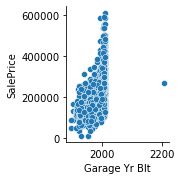

In [7]:
datacleaning('Garage Yr Blt')#the graph doesn't make believe it should be included

count    2028.000000
mean       99.745069
std       174.992265
min         0.000000
25%         0.000000
50%         0.000000
75%       161.250000
max      1600.000000
Name: Mas Vnr Area, dtype: float64
22
[2.890e+02 1.320e+02 0.000e+00 8.200e+01 1.800e+02 1.920e+02 2.320e+02
 4.560e+02 1.480e+02       nan 3.000e+00 3.360e+02 4.800e+02 3.200e+02
 1.040e+02 3.350e+02 4.000e+01 1.100e+02 1.060e+02 5.130e+02 1.840e+02
 5.220e+02 1.430e+02 3.480e+02 1.170e+02 5.100e+02 1.450e+02 9.600e+01
 6.680e+02 5.000e+01 2.280e+02 6.500e+01 3.610e+02 7.480e+02 1.970e+02
 5.720e+02 1.280e+02 1.200e+02 2.540e+02 8.600e+01 3.000e+01 5.400e+01
 2.460e+02 3.970e+02 2.960e+02 1.440e+02 9.020e+02 2.610e+02 2.600e+02
 2.750e+02 5.700e+01 1.050e+03 3.590e+02 1.080e+02 6.620e+02 5.000e+02
 2.100e+02 1.650e+02 2.080e+02 3.600e+02 1.600e+02 6.400e+01 2.240e+02
 2.060e+02 1.160e+02 6.510e+02 5.040e+02 2.520e+02 3.370e+02 8.400e+01
 3.090e+02 4.660e+02 6.000e+02 1.890e+02 3.680e+02 1.980e+02 1.400e+02
 9.220e+02 1.

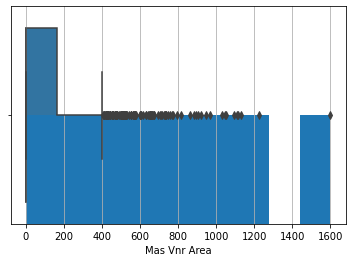

In [19]:
datacleaning('Mas Vnr Area')#looks like a vertical rectangle-despite high cor#
#include Total Bsmt SF, include Year Built, Overall Qual,include sq feet, Full Bath,half bath, totrms abv gr, fireplace, mo sold, yr sold, Wood Deck SF\
#Lot Area, MS Subclass-include Masonry Type dummies
dftrain=pd.get_dummies(dftrain, prefix='Masonry Type', columns=['Mas Vnr Area'], drop_first=True)
dftest=pd.get_dummies(dftest, prefix='Masonry Type', columns=['Mas Vnr Area'], drop_first=True)

count    2048.000000
mean        0.063477
std         0.251763
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: Bsmt Half Bath, dtype: float64
1
[ 0.  1. nan  2.]
0.0    1922
1.0     122
2.0       4
Name: Bsmt Half Bath, dtype: int64
count    878.000000
mean       0.055809
std        0.229683
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Bsmt Half Bath, dtype: float64
0
[0 1]
0    829
1     49
Name: Bsmt Half Bath, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
                Bsmt Half Bath  SalePrice
Bsmt Half Bath        1.000000  -0.045378
SalePrice            -0.045378   1.000000


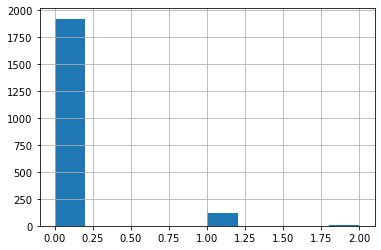

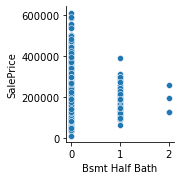

In [9]:
datacleaning('Bsmt Half Bath')#low correlation-doesn't look useful

count    2049.000000
mean      473.766227
std       215.944850
min         0.000000
25%       319.000000
50%       480.000000
75%       576.000000
max      1418.000000
Name: Garage Area, dtype: float64
0
[ 475.  559.  246.  400.  484.  578.  525.  531.  420.  504.  264.  632.
  576.  480.  610.  624.  513.  528.  614.  450.  499.  575.  572.  530.
  336.  240.    0.  542.  481.  410.  826.  384.  546.  276.  850.  602.
  352.  786.  660.  270.  280.  474.  440.  564.  299.  293.  386.  671.
  550.  690.  225.  350.  216.  380.  843.  539.  834.  322. 1166.  720.
  392.  555.  252.  502.  516.  608.  495.  396.  556.  725.  670.  560.
  501.  490.  286.  360.  479.  626.  470.  304.  864.  403.  579.  288.
  473.  627.  758.  431.  260.  366.  852.  672.  486.  656.  716.  442.
  297.  388.  461.  447.  619.  308.  506.  319.  676.  312.  478.  342.
  393.  983.  923.  487.  543.  453.  541.  754.  666.  529.  714.  968.
  788.  812.  600.  483.  300.  430.  230.  505.  368.  618.  402.

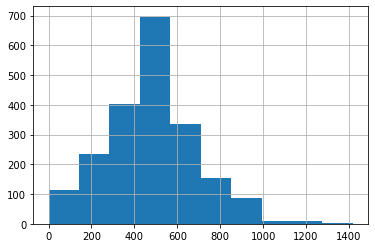

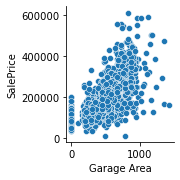

In [10]:
datacleaning('Garage Area')#It appears that Garage Area is a better variable than Garage Cars
enclal.

#include Total Bsmt SF, include Year Built, Overall Qual,include sq feet, Full Bath,half bath, totrms abv gr, fireplace, mo sold, yr sold, Wood Deck SF\
#Lot Area, MS Subclass-include Masonry Type dummies, Garage Area,

count    2049.000000
mean      567.853587
std       445.027230
min         0.000000
25%       220.000000
50%       475.000000
75%       811.000000
max      2336.000000
Name: Bsmt Unf SF, dtype: float64
0
[ 192.  276.  326.  384.  676.  557.    0.  188.  632.  390.   96.  815.
  147. 1327. 1430.  624.  470.  660.  732.  402.  343. 1209.  233.  141.
  224.  336.  957.  672. 1420.  792.  507.  417.  160.   36. 1139.  570.
  136.  690. 1050.  134.  398.  156.  776.  412.  764.  403.  500.  133.
  370.  216.  292.  190.  450.  778.  628. 1120.  328.  576.  727.  914.
  285.  976. 1802. 1346.  162. 1140.  970. 1616.  768.  872.  520.  662.
  936.  448.  312.  876.  325. 1251.  551.  588.  320.  599.   98.  122.
  138. 1081.  550.  250.  408.  547.  180.  245.  114.  191.   32.  595.
  269.  978. 1078. 1116.  308. 1290.  587.  107.  706.  565.  161. 1008.
  584.  707.  637.  113.  367.  677.  466.  100.  396.   25.  780. 1530.
 1528.  744.  381.  218.  610.  459.  606.  144.  888.  220. 1752.

             Bsmt Unf SF  SalePrice
Bsmt Unf SF     1.000000   0.190123
SalePrice       0.190123   1.000000


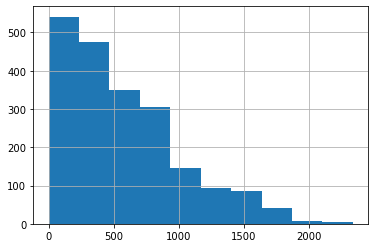

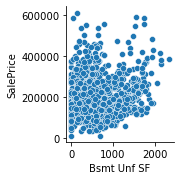

In [15]:
datacleaning('Bsmt Unf SF') #low correlation-graph blob

count     2050
unique       9
top        WD 
freq      1781
Name: Sale Type, dtype: object
0
['WD ' 'New' 'COD' 'ConLD' 'Con' 'CWD' 'Oth' 'ConLI' 'ConLw']
WD       1781
New       160
COD        63
ConLD      16
CWD        10
ConLI       7
ConLw       5
Con         4
Oth         4
Name: Sale Type, dtype: int64
count     878
unique     10
top       WD 
freq      755
Name: Sale Type, dtype: object
0
['WD ' 'New' 'Con' 'COD' 'VWD' 'CWD' 'ConLD' 'ConLI' 'Oth' 'ConLw']
WD       755
New       78
COD       24
ConLD      9
ConLw      3
Oth        3
CWD        2
ConLI      2
Con        1
VWD        1
Name: Sale Type, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


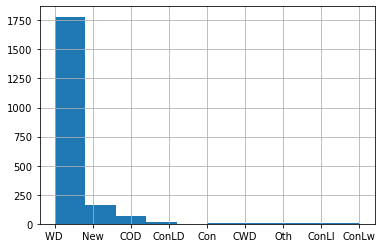

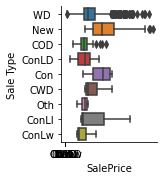

In [27]:
datacleaningbox('Sale Type') #Given that 1781 observations are WD and that 400 rows per feature, this does not strike me as worth including.
#include Total Bsmt SF, include Year Built, Overall Qual,include sq feet, Full Bath,half bath, totrms abv gr, fireplace, mo sold, yr sold, Wood Deck SF\
#Lot Area, MS Subclass-include Masonry Type dummies, Garage Area,

count       2050
unique         8
top       1Story
freq        1058
Name: House Style, dtype: object
0
['2Story' '1Story' '1.5Fin' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin' '1.5Unf']
1Story    1058
2Story     598
1.5Fin     218
SLvl        94
SFoyer      50
2.5Unf      14
1.5Unf      12
2.5Fin       6
Name: House Style, dtype: int64
count        878
unique         8
top       1Story
freq         422
Name: House Style, dtype: object
0
['2Story' '1Story' '1.5Fin' 'SLvl' 'SFoyer' '2.5Fin' '2.5Unf' '1.5Unf']
1Story    422
2Story    274
1.5Fin     96
SLvl       34
SFoyer     33
2.5Unf     10
1.5Unf      7
2.5Fin      2
Name: House Style, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


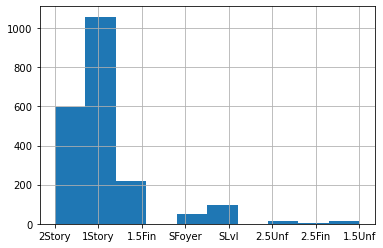

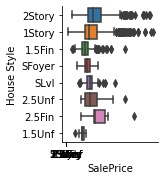

In [30]:
datacleaningbox('House Style')
dftrain=pd.get_dummies(dftrain, prefix='House Style', columns=['House Style'], drop_first=True)
#include Total Bsmt SF, include Year Built, Overall Qual,include sq feet, Full Bath,half bath, totrms abv gr, fireplace, mo sold, yr sold, Wood Deck SF\
#Lot Area, MS Subclass-include Masonry Type dummies, Garage Area, House Style dummies, 

count       65
unique       5
top       Shed
freq        56
Name: Misc Feature, dtype: object
1985
[nan 'Shed' 'TenC' 'Gar2' 'Othr' 'Elev']
Shed    56
Gar2     4
Othr     3
TenC     1
Elev     1
Name: Misc Feature, dtype: int64
count       41
unique       3
top       Shed
freq        39
Name: Misc Feature, dtype: object
837
[nan 'Shed' 'Othr' 'Gar2']
Shed    39
Gar2     1
Othr     1
Name: Misc Feature, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


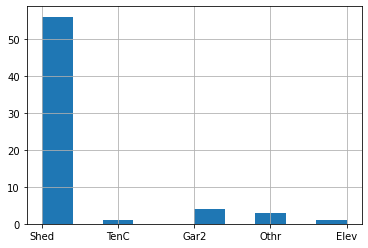

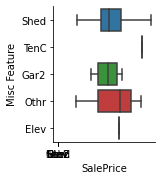

In [31]:
datacleaningbox('Misc Feature')  #Too many missing points and NaN's

count     2050
unique       5
top       1Fam
freq      1699
Name: Bldg Type, dtype: object
0
['1Fam' 'TwnhsE' 'Twnhs' '2fmCon' 'Duplex']
1Fam      1699
TwnhsE     161
Duplex      75
Twnhs       69
2fmCon      46
Name: Bldg Type, dtype: int64
count      878
unique       5
top       1Fam
freq       724
Name: Bldg Type, dtype: object
0
['2fmCon' 'Duplex' '1Fam' 'TwnhsE' 'Twnhs']
1Fam      724
TwnhsE     72
Duplex     34
Twnhs      32
2fmCon     16
Name: Bldg Type, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


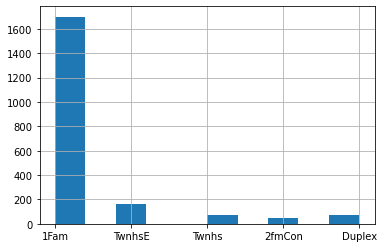

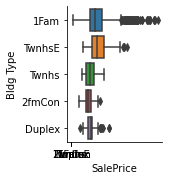

In [32]:
datacleaningbox('Bldg Type')  #Does not look as though it makes a difference based on boxplot

count     2050
unique       9
top       Norm
freq      1767
Name: Condition 1, dtype: object
0
['RRAe' 'Norm' 'PosA' 'Artery' 'Feedr' 'PosN' 'RRAn' 'RRNe' 'RRNn']
Norm      1767
Feedr      108
Artery      70
RRAn        36
PosN        27
RRAe        21
PosA        12
RRNn         6
RRNe         3
Name: Condition 1, dtype: int64
count      878
unique       9
top       Norm
freq       755
Name: Condition 1, dtype: object
0
['Norm' 'Feedr' 'Artery' 'PosA' 'RRAn' 'RRNn' 'RRAe' 'RRNe' 'PosN']
Norm      755
Feedr      55
Artery     22
RRAn       14
PosN       11
PosA        8
RRAe        7
RRNn        3
RRNe        3
Name: Condition 1, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


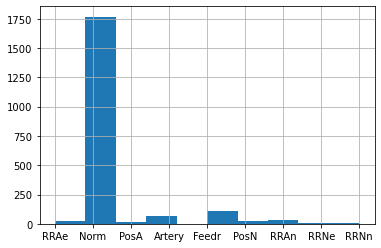

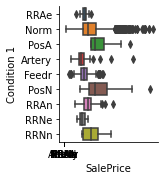

In [33]:
datacleaningbox('Condition 1')  ##Based on the data dictionary and that the \
#vast numbers of these are normal, I haven't dummied this variable.

count     2050
unique       8
top       Norm
freq      2024
Name: Condition 2, dtype: object
0
['Norm' 'RRNn' 'Feedr' 'Artery' 'PosA' 'PosN' 'RRAe' 'RRAn']
Norm      2024
Feedr       11
Artery       5
PosN         3
PosA         3
RRNn         2
RRAn         1
RRAe         1
Name: Condition 2, dtype: int64
count      878
unique       3
top       Norm
freq       875
Name: Condition 2, dtype: object
0
['Norm' 'Feedr' 'PosA']
Norm     875
Feedr      2
PosA       1
Name: Condition 2, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


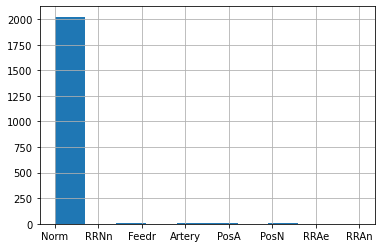

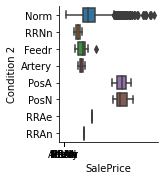

In [34]:
datacleaningbox('Condition 2')  # Given that 2024 of 20500 are normal, it does not appear to make a difference.

count     1936
unique       3
top        Unf
freq       848
Name: Garage Finish, dtype: object
114
['RFn' 'Unf' 'Fin' nan]
Unf    848
RFn    579
Fin    509
Name: Garage Finish, dtype: int64
count     833
unique      3
top       Unf
freq      382
Name: Garage Finish, dtype: object
45
['Unf' 'Fin' 'RFn' nan]
Unf    382
RFn    233
Fin    218
Name: Garage Finish, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


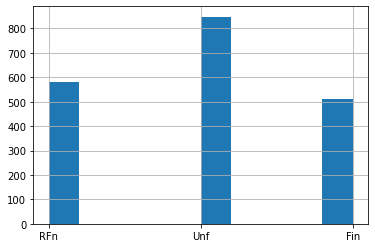

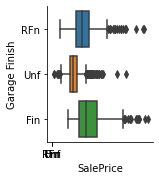

In [35]:
datacleaningbox('Garage Finish')  #This seems like a minor detail-the number of features already included makes this prohibitive.

count     2050
unique       4
top        Lvl
freq      1842
Name: Land Contour, dtype: object
0
['Lvl' 'HLS' 'Bnk' 'Low']
Lvl    1842
HLS      85
Bnk      80
Low      43
Name: Land Contour, dtype: int64
count     878
unique      4
top       Lvl
freq      790
Name: Land Contour, dtype: object
0
['Lvl' 'Bnk' 'Low' 'HLS']
Lvl    790
Bnk     36
HLS     35
Low     17
Name: Land Contour, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


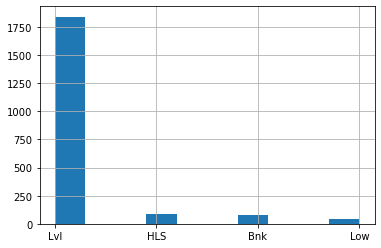

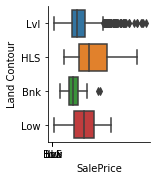

In [36]:
datacleaningbox('Land Contour') #The flatness of the property seems minor and most are the same.-Excluded

count     2050
unique       3
top        Gtl
freq      1952
Name: Land Slope, dtype: object
0
['Gtl' 'Sev' 'Mod']
Gtl    1952
Mod      88
Sev      10
Name: Land Slope, dtype: int64
count     878
unique      3
top       Gtl
freq      835
Name: Land Slope, dtype: object
0
['Gtl' 'Mod' 'Sev']
Gtl    835
Mod     37
Sev      6
Name: Land Slope, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


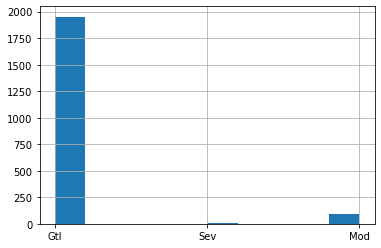

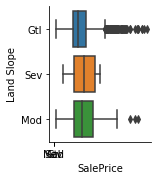

In [37]:
datacleaningbox('Land Slope') #This seems minor as well.

count       2050
unique         3
top       AllPub
freq        2048
Name: Utilities, dtype: object
0
['AllPub' 'NoSeWa' 'NoSewr']
AllPub    2048
NoSewr       1
NoSeWa       1
Name: Utilities, dtype: int64
count        878
unique         2
top       AllPub
freq         877
Name: Utilities, dtype: object
0
['AllPub' 'NoSewr']
AllPub    877
NoSewr      1
Name: Utilities, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


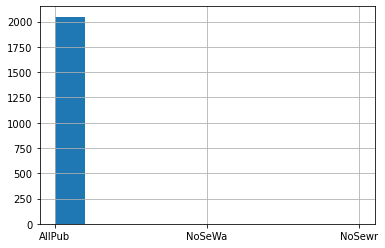

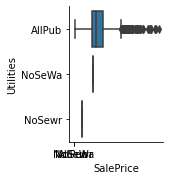

In [38]:
datacleaningbox('Utilities')  #There are only 2 non all utility observations-excluded.

count       2050
unique         5
top       Inside
freq        1503
Name: Lot Config, dtype: object
0
['CulDSac' 'Inside' 'Corner' 'FR2' 'FR3']
Inside     1503
Corner      348
CulDSac     131
FR2          60
FR3           8
Name: Lot Config, dtype: int64
count        878
unique         5
top       Inside
freq         636
Name: Lot Config, dtype: object
0
['Inside' 'CulDSac' 'Corner' 'FR2' 'FR3']
Inside     636
Corner     163
CulDSac     49
FR2         25
FR3          5
Name: Lot Config, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


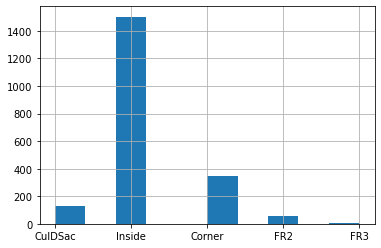

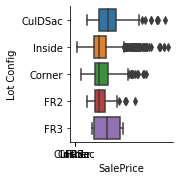

In [40]:
datacleaningbox('Lot Config')  ##I think this is one to dummy to include. There appears to be variation.
dftrain=pd.get_dummies(dftrain, prefix='lot', columns=['Lot Config'], drop_first=True)
dftest=pd.get_dummies(dftest, prefix='lot', columns=['Lot Config'], drop_first=True)

count       399
unique        4
top       MnPrv
freq        226
Name: Fence, dtype: object
1651
[nan 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']
MnPrv    226
GdPrv     83
GdWo      80
MnWw      10
Name: Fence, dtype: int64
count       172
unique        4
top       MnPrv
freq        103
Name: Fence, dtype: object
706
[nan 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']
MnPrv    103
GdPrv     35
GdWo      32
MnWw       2
Name: Fence, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


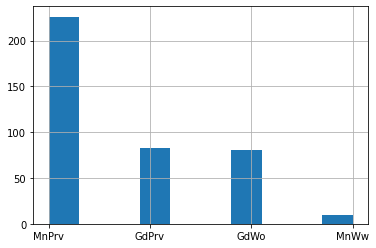

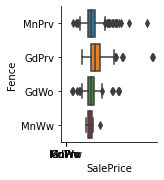

In [41]:
datacleaningbox('Fence')  # We are missing way too much of the data(1651 points). This is not included

count     2050
unique       4
top        Reg
freq      1295
Name: Lot Shape, dtype: object
0
['IR1' 'Reg' 'IR2' 'IR3']
Reg    1295
IR1     691
IR2      55
IR3       9
Name: Lot Shape, dtype: int64
count     878
unique      4
top       Reg
freq      564
Name: Lot Shape, dtype: object
0
['Reg' 'IR1' 'IR3' 'IR2']
Reg    564
IR1    286
IR2     21
IR3      7
Name: Lot Shape, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


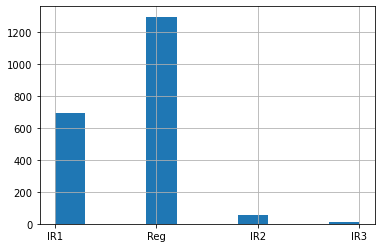

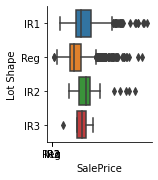

In [43]:
datacleaningbox('Lot Shape') #The distribution looks fairly similar--exclude

count      140
unique       2
top       Grvl
freq        85
Name: Alley, dtype: object
1910
[nan 'Pave' 'Grvl']
Grvl    85
Pave    55
Name: Alley, dtype: int64
count       58
unique       2
top       Grvl
freq        35
Name: Alley, dtype: object
820
['Grvl' nan 'Pave']
Grvl    35
Pave    23
Name: Alley, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


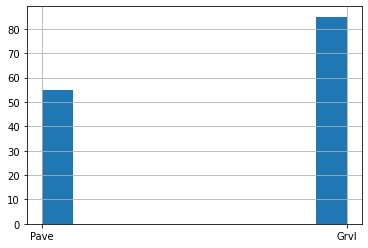

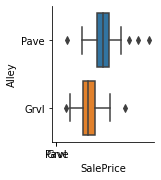

In [44]:
datacleaningbox('Alley')  #Too much missing data

count     2050
unique       2
top       Pave
freq      2043
Name: Street, dtype: object
0
['Pave' 'Grvl']
Pave    2043
Grvl       7
Name: Street, dtype: int64
count      878
unique       2
top       Pave
freq       873
Name: Street, dtype: object
0
['Pave' 'Grvl']
Pave    873
Grvl      5
Name: Street, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


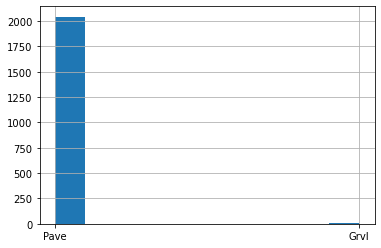

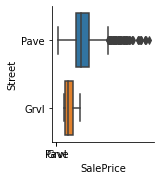

In [45]:
datacleaningbox('Street')  #All but 7 are paved--excluded

count     2050
unique       7
top         RL
freq      1598
Name: MS Zoning, dtype: object
0
['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']
RL         1598
RM          315
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64
count     878
unique      6
top        RL
freq      674
Name: MS Zoning, dtype: object
0
['RM' 'RL' 'FV' 'RH' 'C (all)' 'I (all)']
RL         674
RM         146
FV          38
RH          13
C (all)      6
I (all)      1
Name: MS Zoning, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


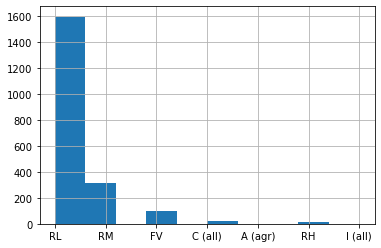

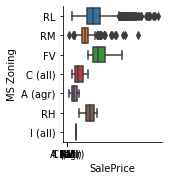

In [46]:
datacleaningbox('MS Zoning')  #Given that 1598 are the same, adding this feature seems to be a luxury.

count      2050
unique       28
top       NAmes
freq        310
Name: Neighborhood, dtype: object
0
['Sawyer' 'SawyerW' 'NAmes' 'Timber' 'Edwards' 'OldTown' 'BrDale'
 'CollgCr' 'Somerst' 'Mitchel' 'StoneBr' 'NridgHt' 'Gilbert' 'Crawfor'
 'IDOTRR' 'NWAmes' 'Veenker' 'MeadowV' 'SWISU' 'NoRidge' 'ClearCr'
 'Blmngtn' 'BrkSide' 'NPkVill' 'Blueste' 'GrnHill' 'Greens' 'Landmrk']
NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
NWAmes      87
SawyerW     87
Mitchel     82
BrkSide     75
Crawfor     71
IDOTRR      69
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
Veenker     17
NPkVill     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64
count       878
unique       26
top       NAmes
freq        133
Name: Neighborhood, dtype: object
0
['OldTown' 'Sawyer' 'Gilbert' 'NAmes' 'MeadowV' 'CollgCr' 'Somerst'
 'Mi

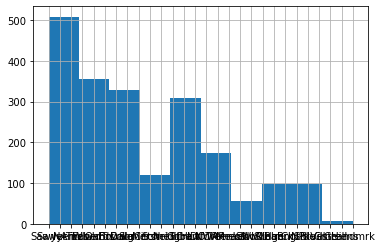

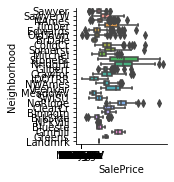

In [48]:
datacleaningbox('Neighborhood')  #This is dummied to see if the neighborhood makes a difference.
dftrain=pd.get_dummies(dftrain, prefix='neighborhood', columns=['Neighborhood'], drop_first=True)
dftest=pd.get_dummies(dftest, prefix='neighborhood', columns=['Neighborhood'], drop_first=True)

count      2050
unique        6
top       Gable
freq       1618
Name: Roof Style, dtype: object
0
['Gable' 'Hip' 'Flat' 'Mansard' 'Shed' 'Gambrel']
Gable      1618
Hip         397
Flat         13
Gambrel      12
Mansard       7
Shed          3
Name: Roof Style, dtype: int64
count       878
unique        6
top       Gable
freq        702
Name: Roof Style, dtype: object
0
['Gable' 'Hip' 'Gambrel' 'Flat' 'Mansard' 'Shed']
Gable      702
Hip        153
Gambrel     10
Flat         7
Mansard      4
Shed         2
Name: Roof Style, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


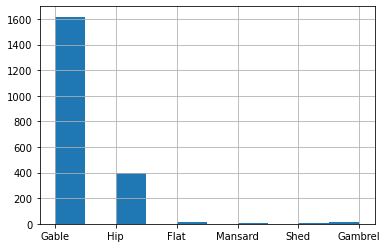

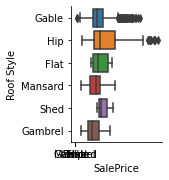

In [49]:
datacleaningbox('Roof Style') # excluded based on graph and one type dominates

count     1996
unique       5
top         TA
freq       887
Name: Bsmt Qual, dtype: object
54
['TA' 'Gd' 'Fa' nan 'Ex' 'Po']
TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: Bsmt Qual, dtype: int64
count     853
unique      5
top        TA
freq      396
Name: Bsmt Qual, dtype: object
25
['Fa' 'Gd' 'TA' 'Ex' nan 'Po']
TA    396
Gd    355
Ex     73
Fa     28
Po      1
Name: Bsmt Qual, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


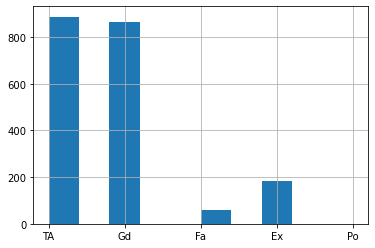

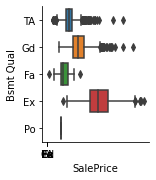

In [50]:
datacleaningbox('Bsmt Qual')  #The height of the basement does not seems to be an explainer in
#basement variability more than total square feet.

count        2050
unique         15
top       VinylSd
freq          724
Name: Exterior 1st, dtype: object
0
['HdBoard' 'VinylSd' 'Wd Sdng' 'BrkFace' 'Plywood' 'MetalSd' 'AsbShng'
 'CemntBd' 'WdShing' 'Stucco' 'BrkComm' 'Stone' 'CBlock' 'ImStucc'
 'AsphShn']
VinylSd    724
MetalSd    330
HdBoard    300
Wd Sdng    276
Plywood    152
CemntBd     90
BrkFace     64
WdShing     45
AsbShng     33
Stucco      27
BrkComm      3
CBlock       2
Stone        2
ImStucc      1
AsphShn      1
Name: Exterior 1st, dtype: int64
count         878
unique         13
top       VinylSd
freq          302
Name: Exterior 1st, dtype: object
0
['AsbShng' 'Plywood' 'VinylSd' 'Wd Sdng' 'CemntBd' 'MetalSd' 'HdBoard'
 'BrkComm' 'Stucco' 'WdShing' 'BrkFace' 'PreCast' 'AsphShn']
VinylSd    302
Wd Sdng    144
HdBoard    142
MetalSd    119
Plywood     69
CemntBd     35
BrkFace     24
Stucco      16
WdShing     11
AsbShng     11
BrkComm      3
AsphShn      1
PreCast      1
Name: Exterior 1st, dtype: int64
AxesSubplot(0.12

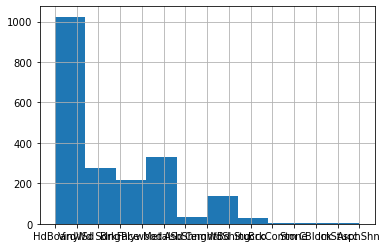

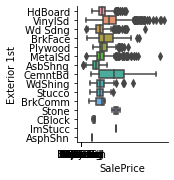

In [51]:
datacleaningbox('Exterior 1st')  #This detail does not seem worth including given the number of existing features.

count     1051
unique       5
top         Gd
freq       523
Name: Fireplace Qu, dtype: object
999
[nan 'TA' 'Gd' 'Po' 'Ex' 'Fa']
Gd    523
TA    407
Fa     59
Po     31
Ex     31
Name: Fireplace Qu, dtype: int64
count     456
unique      5
top        Gd
freq      220
Name: Fireplace Qu, dtype: object
422
[nan 'Gd' 'Fa' 'TA' 'Po' 'Ex']
Gd    220
TA    193
Fa     16
Po     15
Ex     12
Name: Fireplace Qu, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


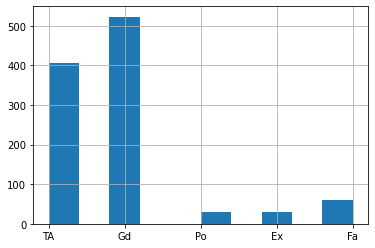

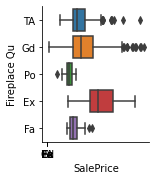

In [52]:
datacleaningbox('Fireplace Qu') #Most of the values are na or within two categories. excluded

count     1936
unique       5
top         TA
freq      1831
Name: Garage Qual, dtype: object
114
['TA' 'Fa' nan 'Gd' 'Ex' 'Po']
TA    1831
Fa      82
Gd      18
Ex       3
Po       2
Name: Garage Qual, dtype: int64
count     833
unique      4
top        TA
freq      782
Name: Garage Qual, dtype: object
45
['Po' 'TA' 'Fa' nan 'Gd']
TA    782
Fa     42
Gd      6
Po      3
Name: Garage Qual, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


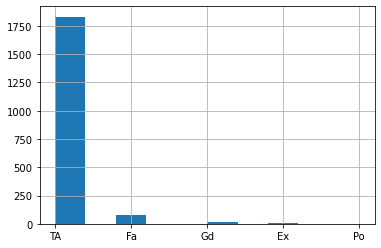

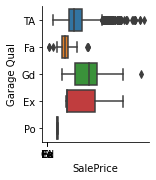

In [53]:
datacleaningbox('Garage Qual') #1831 were typical. This doesn't appear to be useful.

count     2050
unique       8
top        Typ
freq      1914
Name: Functional, dtype: object
0
['Typ' 'Mod' 'Min2' 'Maj1' 'Min1' 'Sev' 'Sal' 'Maj2']
Typ     1914
Min2      42
Min1      42
Mod       29
Maj1      12
Maj2       7
Sev        2
Sal        2
Name: Functional, dtype: int64
count     878
unique      6
top       Typ
freq      812
Name: Functional, dtype: object
0
['Typ' 'Min2' 'Min1' 'Mod' 'Maj1' 'Maj2']
Typ     812
Min2     28
Min1     23
Maj1      7
Mod       6
Maj2      2
Name: Functional, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


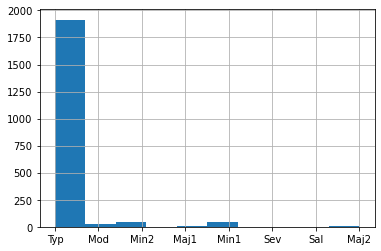

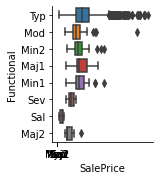

In [54]:
datacleaningbox('Functional')  #1914 are typical. Given limited features, I don't think this will help

count     1936
unique       5
top         TA
freq      1867
Name: Garage Cond, dtype: object
114
['TA' 'Fa' nan 'Po' 'Gd' 'Ex']
TA    1867
Fa      47
Gd      12
Po       8
Ex       2
Name: Garage Cond, dtype: int64
count     833
unique      5
top        TA
freq      796
Name: Garage Cond, dtype: object
45
['Po' 'TA' nan 'Fa' 'Gd' 'Ex']
TA    796
Fa     27
Po      6
Gd      3
Ex      1
Name: Garage Cond, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


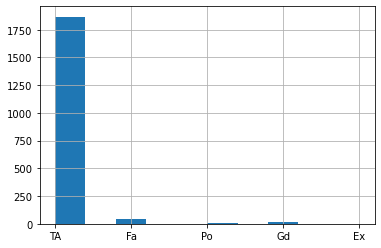

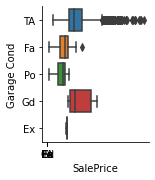

In [55]:
datacleaningbox('Garage Cond') ##1867 are typical. Given limited features, I don't think this will help

count     2051
unique       4
top         TA
freq      1047
Name: Kitchen Qual, dtype: object
0
['Gd' 'TA' 'Fa' 'Ex']
TA    1047
Gd     806
Ex     151
Fa      47
Name: Kitchen Qual, dtype: int64
count     878
unique      5
top        TA
freq      447
Name: Kitchen Qual, dtype: object
0
['Fa' 'TA' 'Gd' 'Ex' 'Po']
TA    447
Gd    354
Ex     53
Fa     23
Po      1
Name: Kitchen Qual, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000


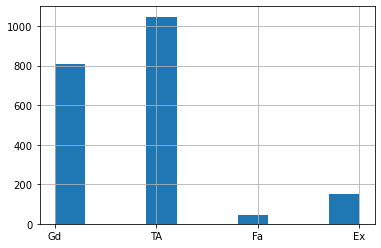

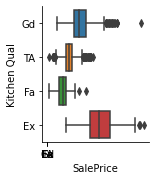

In [76]:
datacleaningbox('Kitchen Qual')#Good deal of variability-transforming into 1 low quality, 5 excellent
dftrain['Kitchen Qual'] = dftrain['Kitchen Qual'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2}, inplace=True)
dftest['Kitchen Qual'] = dftest['Kitchen Qual'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po':1}, inplace=True)



count     2051
unique       3
top          Y
freq      1861
Name: Paved Drive, dtype: object
0
['Y' 'N' 'P']
Y    1861
N     151
P      39
Name: Paved Drive, dtype: int64
count     878
unique      3
top         Y
freq      790
Name: Paved Drive, dtype: object
0
['Y' 'N' 'P']
Y    790
N     65
P     23
Name: Paved Drive, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


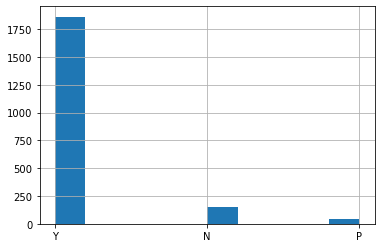

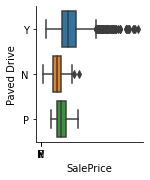

In [78]:
datacleaningbox('Paved Drive') #This does not have good intuition about correlation


count      9
unique     4
top       Gd
freq       4
Name: Pool QC, dtype: object
2042
[nan 'Fa' 'Gd' 'Ex' 'TA']
Gd    4
Fa    2
TA    2
Ex    1
Name: Pool QC, dtype: int64
count      4
unique     2
top       Ex
freq       3
Name: Pool QC, dtype: object
874
[nan 'Ex' 'TA']
Ex    3
TA    1
Name: Pool QC, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


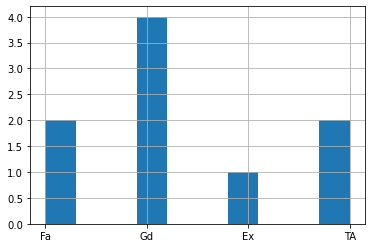

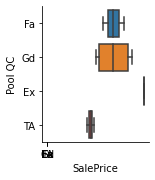

In [80]:
datacleaningbox('Pool QC') #only 9 observations--exclude as outliers

count      2051
unique        5
top       SBrkr
freq       1868
Name: Electrical, dtype: object
0
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix']
SBrkr    1868
FuseA     140
FuseF      35
FuseP       7
Mix         1
Name: Electrical, dtype: int64
count       877
unique        4
top       SBrkr
freq        813
Name: Electrical, dtype: object
1
['FuseP' 'SBrkr' 'FuseA' 'FuseF' nan]
SBrkr    813
FuseA     48
FuseF     15
FuseP      1
Name: Electrical, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


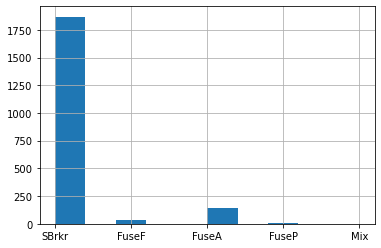

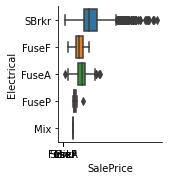

In [81]:
datacleaningbox('Electrical')#The fuse box is too granular to make a difference and 1868 are standard.

count     2051
unique       2
top          Y
freq      1910
Name: Central Air, dtype: object
0
['Y' 'N']
Y    1910
N     141
Name: Central Air, dtype: int64
count     878
unique      2
top         Y
freq      823
Name: Central Air, dtype: object
0
['N' 'Y']
Y    823
N     55
Name: Central Air, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000


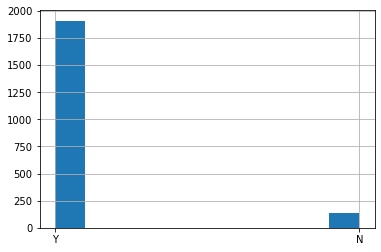

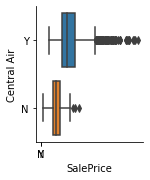

In [83]:
datacleaningbox('Central Air')
#the vast majority have central air but worth a lasso or ridge attempt. Transformed to 1,0 dummy
dftrain['Central Air'] = dftrain['Central Air'].replace({'Y': 1, 'N': 0}, inplace=True)
dftest['Central Air'] = dftest['Central Air'].replace({'Y': 1, 'N': 0}, inplace=True)



count        2051
unique          6
top       CompShg
freq         2025
Name: Roof Matl, dtype: object
0
['CompShg' 'WdShngl' 'Tar&Grv' 'WdShake' 'Membran' 'ClyTile']
CompShg    2025
Tar&Grv      15
WdShngl       5
WdShake       4
Membran       1
ClyTile       1
Name: Roof Matl, dtype: int64
count         878
unique          6
top       CompShg
freq          861
Name: Roof Matl, dtype: object
0
['CompShg' 'Metal' 'WdShake' 'Tar&Grv' 'WdShngl' 'Roll']
CompShg    861
Tar&Grv      8
WdShake      5
WdShngl      2
Metal        1
Roll         1
Name: Roof Matl, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


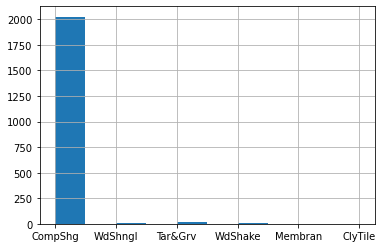

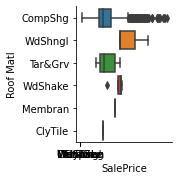

In [84]:
datacleaningbox('Roof Matl')  #All but 26 are one category--excluded

count     2051
unique       5
top         Ex
freq      1065
Name: Heating QC, dtype: object
0
['Ex' 'TA' 'Gd' 'Fa' 'Po']
Ex    1065
TA     597
Gd     319
Fa      67
Po       3
Name: Heating QC, dtype: int64
count     878
unique      4
top        Ex
freq      429
Name: Heating QC, dtype: object
0
['Gd' 'TA' 'Ex' 'Fa']
Ex    429
TA    267
Gd    157
Fa     25
Name: Heating QC, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000


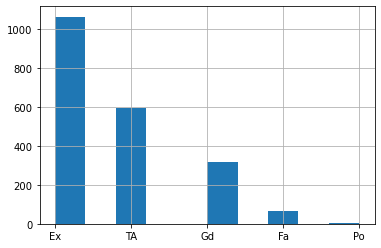

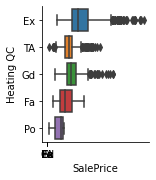

In [86]:
datacleaningbox('Heating QC')
dftrain['Heating QC'] = dftrain['Heating QC'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po':1}, inplace=True)
dftest['Heating QC'] = dftest['Heating QC'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2}, inplace=True)
dftrain

count     1995
unique       6
top        Unf
freq      1749
Name: BsmtFin Type 2, dtype: object
56
['Unf' 'Rec' nan 'BLQ' 'GLQ' 'LwQ' 'ALQ']
Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin Type 2, dtype: int64
count     853
unique      6
top       Unf
freq      749
Name: BsmtFin Type 2, dtype: object
25
['Unf' 'LwQ' nan 'ALQ' 'GLQ' 'Rec' 'BLQ']
Unf    749
LwQ     29
Rec     26
BLQ     20
ALQ     18
GLQ     11
Name: BsmtFin Type 2, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


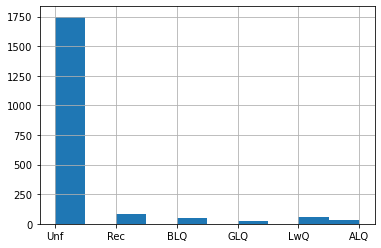

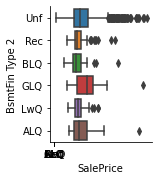

In [87]:
datacleaningbox('BsmtFin Type 2') #very little varitation-excluded

count     1996
unique       6
top        GLQ
freq       615
Name: BsmtFin Type 1, dtype: object
55
['GLQ' 'Unf' 'ALQ' 'Rec' nan 'BLQ' 'LwQ']
GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: BsmtFin Type 1, dtype: int64
count     853
unique      6
top       Unf
freq      248
Name: BsmtFin Type 1, dtype: object
25
['Unf' 'GLQ' 'BLQ' 'Rec' 'ALQ' nan 'LwQ']
Unf    248
GLQ    243
ALQ    136
Rec    105
BLQ     69
LwQ     52
Name: BsmtFin Type 1, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000


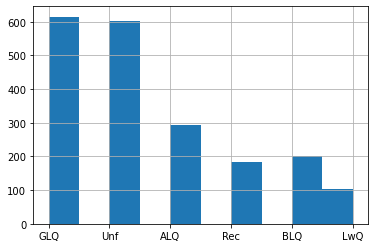

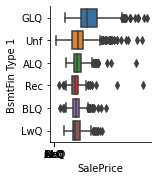

In [94]:
datacleaningbox('BsmtFin Type 1')  #Transformed into dummy of finished and not finished
dftrain['BsmtFin Type 1'] = dftrain['BsmtFin Type 1'].replace({'Unf': 0, np.NaN: 0, 'GLQ': 1, 'ALQ': 1, 'Rec':1, 'LwQ':1, 'BLQ':1}, inplace=True)
dftest['BsmtFin Type 1'] = dftest['BsmtFin Type 1'].replace({'Unf': 0, np.NaN: 0, 'GLQ': 1, 'ALQ': 1, 'Rec':1, 'LwQ': 1, 'BLQ':1}, inplace=True)
dftrain

count     1993
unique       4
top         No
freq      1339
Name: Bsmt Exposure, dtype: object
58
['No' 'Gd' 'Av' nan 'Mn']
No    1339
Av     288
Gd     203
Mn     163
Name: Bsmt Exposure, dtype: int64
count     853
unique      4
top        No
freq      567
Name: Bsmt Exposure, dtype: object
25
['No' 'Av' nan 'Mn' 'Gd']
No    567
Av    130
Gd     80
Mn     76
Name: Bsmt Exposure, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


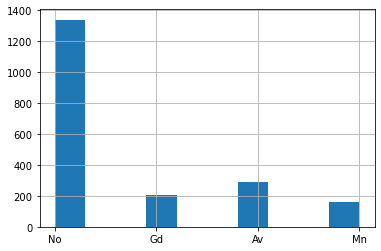

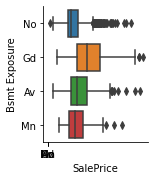

In [95]:
datacleaningbox('Bsmt Exposure')  #Too detailed for the number of features we have

count     1996
unique       5
top         TA
freq      1834
Name: Bsmt Cond, dtype: object
55
['TA' 'Gd' nan 'Fa' 'Po' 'Ex']
TA    1834
Gd      89
Fa      65
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64
count     853
unique      3
top        TA
freq      781
Name: Bsmt Cond, dtype: object
25
['TA' 'Gd' nan 'Fa']
TA    781
Fa     39
Gd     33
Name: Bsmt Cond, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


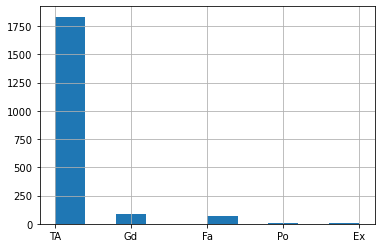

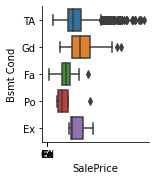

In [96]:
datacleaningbox('Bsmt Cond')#Doesn't show much variability-excluded

count      2051
unique        6
top       PConc
freq        926
Name: Foundation, dtype: object
0
['CBlock' 'PConc' 'BrkTil' 'Slab' 'Stone' 'Wood']
PConc     926
CBlock    863
BrkTil    221
Slab       34
Stone       5
Wood        2
Name: Foundation, dtype: int64
count       878
unique        6
top       PConc
freq        383
Name: Foundation, dtype: object
0
['Stone' 'CBlock' 'PConc' 'BrkTil' 'Slab' 'Wood']
PConc     383
CBlock    381
BrkTil     90
Slab       15
Stone       6
Wood        3
Name: Foundation, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


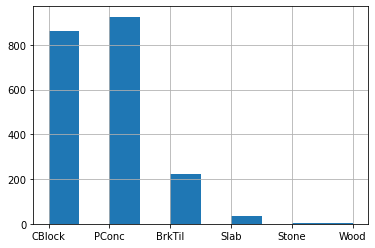

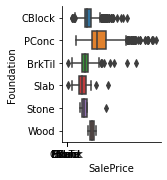

In [97]:
datacleaningbox('Foundation')  #excluded-this is usually seen at the inspection and leads to buy or no buy rather than price
#Given the number of features already entered, excluding

count     2051
unique       5
top         TA
freq      1778
Name: Exter Cond, dtype: object
0
['TA' 'Gd' 'Fa' 'Ex' 'Po']
TA    1778
Gd     215
Fa      49
Ex       7
Po       2
Name: Exter Cond, dtype: int64
count     878
unique      5
top        TA
freq      770
Name: Exter Cond, dtype: object
0
['Fa' 'TA' 'Gd' 'Ex' 'Po']
TA    770
Gd     84
Fa     18
Ex      5
Po      1
Name: Exter Cond, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


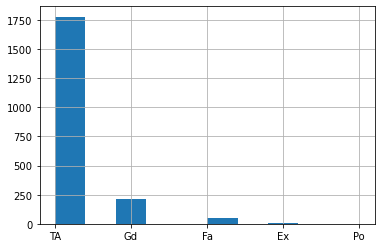

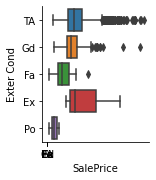

In [98]:
datacleaningbox('Exter Cond') #The vast majority are average=1778-excluded

count     2051
unique       4
top         TA
freq      1247
Name: Exter Qual, dtype: object
0
['Gd' 'TA' 'Ex' 'Fa']
TA    1247
Gd     697
Ex      81
Fa      26
Name: Exter Qual, dtype: int64
count     878
unique      4
top        TA
freq      552
Name: Exter Qual, dtype: object
0
['TA' 'Gd' 'Fa' 'Ex']
TA    552
Gd    292
Ex     25
Fa      9
Name: Exter Qual, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000


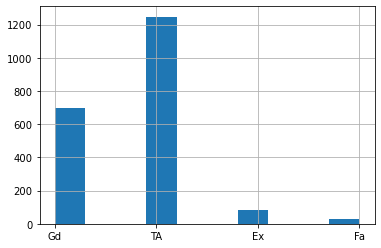

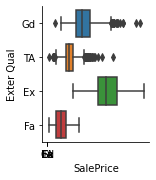

In [100]:
datacleaningbox('Exter Qual')
dftrain['Exter Qual'] = dftrain['Exter Qual'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2,}, inplace=True)
dftest['Exter Qual'] = dftest['Exter Qual'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2}, inplace=True)
dftrain

count     2029
unique       4
top       None
freq      1218
Name: Mas Vnr Type, dtype: object
22
['BrkFace' 'None' nan 'Stone' 'BrkCmn']
None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64
count      877
unique       5
top       None
freq       534
Name: Mas Vnr Type, dtype: object
1
['None' 'BrkFace' 'Stone' 'BrkCmn' 'CBlock' nan]
None       534
BrkFace    250
Stone       80
BrkCmn      12
CBlock       1
Name: Mas Vnr Type, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


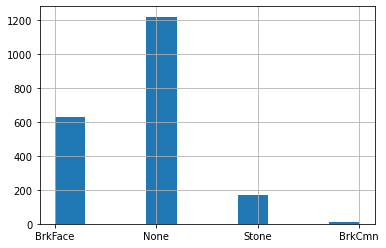

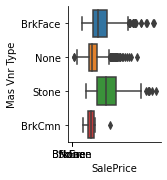

In [101]:
datacleaningbox('Mas Vnr Type') #Most show they didn't have the veneer--excluded

count        2051
unique         15
top       VinylSd
freq          721
Name: Exterior 2nd, dtype: object
0
['Plywood' 'VinylSd' 'Wd Sdng' 'HdBoard' 'MetalSd' 'AsbShng' 'CmentBd'
 'Wd Shng' 'BrkFace' 'Stucco' 'Brk Cmn' 'ImStucc' 'Stone' 'CBlock'
 'AsphShn']
VinylSd    721
MetalSd    324
HdBoard    275
Wd Sdng    262
Plywood    185
CmentBd     90
Wd Shng     63
BrkFace     34
Stucco      30
AsbShng     28
Brk Cmn     17
ImStucc     11
Stone        6
AsphShn      3
CBlock       2
Name: Exterior 2nd, dtype: int64
count         878
unique         16
top       VinylSd
freq          294
Name: Exterior 2nd, dtype: object
0
['AsbShng' 'Plywood' 'VinylSd' 'Wd Sdng' 'CmentBd' 'MetalSd' 'BrkFace'
 'Stucco' 'HdBoard' 'Wd Shng' 'ImStucc' 'Brk Cmn' 'PreCast' 'CBlock'
 'AsphShn' 'Other']
VinylSd    294
Wd Sdng    135
HdBoard    131
MetalSd    123
Plywood     89
CmentBd     35
Wd Shng     18
Stucco      17
BrkFace     13
AsbShng     10
Brk Cmn      5
ImStucc      4
CBlock       1
Other        1
AsphSh

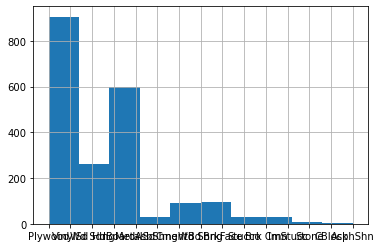

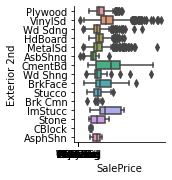

In [102]:
datacleaningbox('Exterior 2nd')#This detail does not seem worth including given the number of existing features especially when this is the second one.

count     2051
unique       5
top       GasA
freq      2018
Name: Heating, dtype: object
0
['GasA' 'GasW' 'Grav' 'Wall' 'OthW']
GasA    2018
GasW      20
Wall       6
Grav       5
OthW       2
Name: Heating, dtype: int64
count      878
unique       4
top       GasA
freq       866
Name: Heating, dtype: object
0
['GasA' 'GasW' 'Grav' 'Floor']
GasA     866
GasW       7
Grav       4
Floor      1
Name: Heating, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


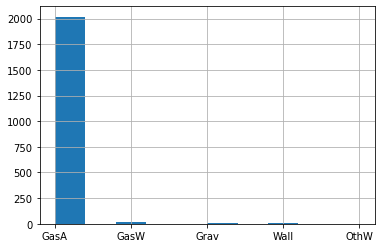

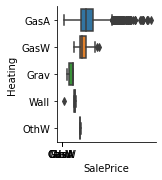

In [103]:
datacleaningbox('Heating')  #Virtually all, 2018 are gas a-no variation so no help-excluded

count       1938
unique         6
top       Attchd
freq        1213
Name: Garage Type, dtype: object
113
['Attchd' 'Detchd' 'BuiltIn' 'Basment' nan '2Types' 'CarPort']
Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64
count        834
unique         6
top       Attchd
freq         518
Name: Garage Type, dtype: object
44
['Detchd' 'Attchd' 'BuiltIn' nan '2Types' 'CarPort' 'Basment']
Attchd     518
Detchd     246
BuiltIn     53
Basment      9
CarPort      4
2Types       4
Name: Garage Type, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
           SalePrice
SalePrice        1.0


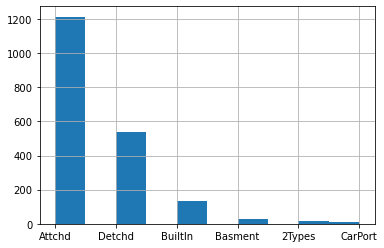

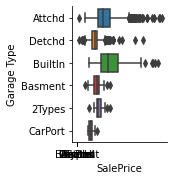

In [104]:
datacleaningbox('Garage Type')  #The type of garage seems less relevant than having a garage that was included in garage sq feet-excluded

In [ ]:
#include Total Bsmt SF, include Year Built, Overall Qual,include sq feet, Full Bath,half bath, totrms abv gr, fireplace, mo sold, yr sold, Wood Deck SF\
#Lot Area, MS Subclass-include Masonry Type dummies, Garage Area, House Style dummies, Lot Config dummies/
#neighborhood dummies included,  Kitchen Qual included, Central Air included, Heating QC included/
#BsmtFin Type 1 included as finished vs not finished, Exter Qual included



In [106]:
dftrain.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [20]:


dftrain.dtypes.sort_values().tail(60)

Pool Area           int64
SalePrice           int64
Misc Val            int64
Screen Porch        int64
Wood Deck SF        int64
Open Porch SF       int64
Enclosed Porch      int64
3Ssn Porch          int64
Bsmt Half Bath    float64
Bsmt Unf SF       float64
Total Bsmt SF     float64
Garage Cars       float64
BsmtFin SF 1      float64
BsmtFin SF 2      float64
Lot Frontage      float64
Garage Area       float64
Garage Yr Blt     float64
Bsmt Full Bath    float64
Sale Type          object
House Style        object
Misc Feature       object
Bldg Type          object
Condition 2        object
Condition 1        object
Garage Finish      object
Land Contour       object
Land Slope         object
Lot Config         object
Utilities          object
Fence              object
Lot Shape          object
Alley              object
Street             object
MS Zoning          object
Neighborhood       object
Roof Style         object
Bsmt Qual          object
Exterior 1st       object
Fireplace Qu

In [80]:
dftest.dtypes.sort_values().head(28)

Id                 int64
Bsmt Unf SF        int64
Yr Sold            int64
1st Flr SF         int64
2nd Flr SF         int64
Low Qual Fin SF    int64
Gr Liv Area        int64
Bsmt Full Bath     int64
Bsmt Half Bath     int64
Full Bath          int64
Half Bath          int64
Bedroom AbvGr      int64
BsmtFin SF 2       int64
Kitchen AbvGr      int64
Fireplaces         int64
Garage Cars        int64
Garage Area        int64
Wood Deck SF       int64
Open Porch SF      int64
Enclosed Porch     int64
3Ssn Porch         int64
Screen Porch       int64
Pool Area          int64
Misc Val           int64
Mo Sold            int64
TotRms AbvGrd      int64
BsmtFin SF 1       int64
Total Bsmt SF      int64
dtype: object

In [11]:
dftest.shape


(878, 81)

In [134]:
dftrain.shape


(2051, 82)

In [ ]:
dftrain.corr()['SalePrice'][(dftrain.corr()['SalePrice'].sort_values().abs() > .4)]

In [ ]:
sns.heatmap(dftrain.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

In [25]:
#Initial Run
features=['Garage Cars','Total Bsmt SF', 'Overall Qual','Full Bath','square_feet']

#X = dftrain._get_numeric_data().drop(columns='SalePrice')
#dftrain = dftrain.reset_index()
#features = list(X.columns)
X=dftrain[features]
target=dftrain['SalePrice']
#define features, target
#X = dftrain[[features]].values
y = target 

#np.where(dftrain[['Total Bsmt SF']] >= np.finfo(np.float64).max)
#np.isnan(dftrain['square_feet'].values.any())

In [26]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=41)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(1536, 5) (1536,)
(513, 5) (513,)


In [79]:
#instantiate lr estimator

lr = LinearRegression(n_jobs=-1)



#fit estimator
lr.fit(X_train, y_train)
#model
#predict and score

odd=lr.predict(X_test)



NameError: name 'X_train' is not defined

In [16]:
#Scoring
lr.score(X_train, y_train)

0.7657976015808108

In [17]:
lr.score(X_test, y_test)

0.8058438805137743

In [ ]:
lr.score(X_test, odd)

In [18]:
cross_val_score(lr, X_train, y_train).mean()

0.7507918231560906

In [29]:
features2=['Garage Cars','Total Bsmt SF', 'Overall Qual','Full Bath','square_feet']
X2=dftest[features2]

In [30]:
# Checking for homoscedasticy of the error and normal distribution of eror
pred=lr.predict(X2)
#import pandas as pd
#predicti
#dfpred[,]=pd.DataFrame(data={"Id":X_test.index,"Prediction":pred} output.to_csv(path_or_buf='/Users/vivekbavda/GADataScienceProjects/projects/project2/project_2/datasets/sample_sub_reg.csv', index=False,quoting=3,sep=';')
#predictions= (pd.DataFrame({'Id':dfpredframe[], 'SalePrice': pred}))
#predictions.to_csv('BavdaKaggle1.csv')

In [39]:
#dfpredframe=pd.
dfpredframe=dftest

In [43]:
dfpredframe[['SalePrice']]=[g for g in pred]

In [42]:
dfpredframe

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,square_feet,SalePrice
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,1928,[180417.44011887166]
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,8,2006,WD,1967,[207644.07391341272]
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,9,2006,New,1496,[194637.6405087591]
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,7,2007,WD,968,[134214.27414825637]
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,7,2009,WD,1394,[190098.58491000664]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,527377110,60,RL,80.0,8000,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,11,2007,WD,1877,[199748.42645785128]
874,1234,535126140,60,RL,90.0,14670,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,8,2008,WD,1988,[204958.31925278596]
875,1373,904100040,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,8,2008,WD,1211,[124331.11220749994]
876,1672,527425140,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,...,0,NaN,GdWo,NaN,0,5,2007,WD,864,[102031.469704519]


In [44]:
#dfpred = [g for g in X_test.index]
#X_test.index
#dfpredframe
#dfpredframe[['Id']]=dfpredframe[['ID']]
#dfpredframe.set_index(dfpredframe.columns[-1], inplace = True)
#dfpredframe.reset_index(inplace=True)
header =['Id','SalePrice']
dfpredframe.to_csv('BavdaKaggle1.csv', columns=header)

In [196]:
residuals = y_test - pred

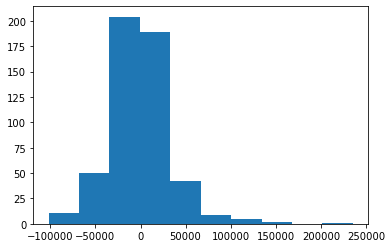

In [197]:
plt.hist(residuals);

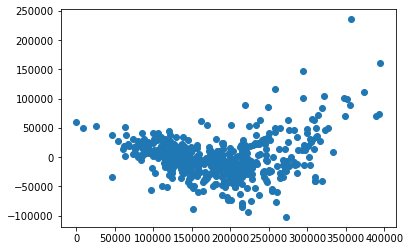

In [198]:
plt.scatter(pred, residuals)

In [ ]:
#Checking to see if the natural log makes a difference

In [ ]:
y_test.map(np.log).hist()

In [ ]:
#Transforming with the natural log as above shows distribution is normal

In [ ]:
y_train_log = y_train.map(np.log)
y_test_log = y_test.map(np.log)
